In [1]:
### "feature selection by overfitting a small sample size"
### train/test on 60 voxels first
### try to overfit to see if model can remember small sample size 
### before giving it lots of data

In [14]:
import time
import numpy as np
import pickle
#from DL_MR import *

import tensorflow as tf
from tensorflow import keras
from IPython.display import clear_output


%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import scipy.io as sio

from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'



In [42]:
# load all data
all_data = np.load('../training_inputs/train_data_all.npy')
all_labels = np.load('../training_inputs/train_labels_all.npy')

In [16]:
# select 60 voxels
data = all_data[:60, :]
labels = all_labels[:60, :]

In [17]:
data.shape

(60, 32)

In [18]:
labels.shape

(60, 40)

In [56]:
labels[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00150867, 0.        , 0.        , 0.00485445,
       0.11199791, 0.2183146 , 0.27290389, 0.25221989, 0.13820058,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [49]:
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [28]:
model = keras.Sequential()
#model.add(keras.layers.InputLayer(32))
model.add(keras.layers.Dense(256,input_dim=32,kernel_initializer='glorot_uniform',activation='relu'))
model.add(keras.layers.Dense(256,kernel_initializer='glorot_uniform',activation='relu'))
model.add(keras.layers.Dense(40,kernel_initializer='glorot_uniform',activation='softmax'))

In [29]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='mean_squared_error',
              metrics=['mae'])


In [30]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_loss',patience=100,),
                  keras.callbacks.ModelCheckpoint(filepath='trained_models/small_model.h5',monitor='val_loss',save_best_only=True,),
                  keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=30)
                 ]

In [31]:
num_epoch = 1000

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 40)                10280     
Total params: 84,520
Trainable params: 84,520
Non-trainable params: 0
_________________________________________________________________


In [33]:
%%time

history = model.fit(data, 
                    labels, 
                    epochs=num_epoch, 
                    batch_size=60,
                    callbacks=callbacks_list,
                    validation_data=(data,labels))

Train on 60 samples, validate on 60 samples
Epoch 1/1000
60/60 [==============================] - 1s 13ms/sample - loss: 0.0035 - mae: 0.0377 - val_loss: 0.0034 - val_mae: 0.0370
Epoch 2/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0034 - mae: 0.0370 - val_loss: 0.0032 - val_mae: 0.0361
Epoch 3/1000
60/60 [==============================] - 0s 1ms/sample - loss: 0.0032 - mae: 0.0361 - val_loss: 0.0031 - val_mae: 0.0351
Epoch 4/1000
60/60 [==============================] - 0s 1ms/sample - loss: 0.0031 - mae: 0.0351 - val_loss: 0.0029 - val_mae: 0.0341
Epoch 5/1000
60/60 [==============================] - 0s 1ms/sample - loss: 0.0029 - mae: 0.0341 - val_loss: 0.0028 - val_mae: 0.0332
Epoch 6/1000
60/60 [==============================] - 0s 1ms/sample - loss: 0.0028 - mae: 0.0332 - val_loss: 0.0027 - val_mae: 0.0322
Epoch 7/1000
60/60 [==============================] - 0s 1ms/sample - loss: 0.0027 - mae: 0.0322 - val_loss: 0.0025 - val_mae: 0.0311
Epoch 8/1000
60/6

Epoch 60/1000
60/60 [==============================] - 0s 1ms/sample - loss: 6.7789e-04 - mae: 0.0128 - val_loss: 6.7306e-04 - val_mae: 0.0127
Epoch 61/1000
60/60 [==============================] - 0s 1ms/sample - loss: 6.7306e-04 - mae: 0.0127 - val_loss: 6.6835e-04 - val_mae: 0.0127
Epoch 62/1000
60/60 [==============================] - 0s 1ms/sample - loss: 6.6835e-04 - mae: 0.0127 - val_loss: 6.6333e-04 - val_mae: 0.0126
Epoch 63/1000
60/60 [==============================] - 0s 1ms/sample - loss: 6.6333e-04 - mae: 0.0126 - val_loss: 6.5853e-04 - val_mae: 0.0126
Epoch 64/1000
60/60 [==============================] - 0s 1ms/sample - loss: 6.5853e-04 - mae: 0.0126 - val_loss: 6.5363e-04 - val_mae: 0.0125
Epoch 65/1000
60/60 [==============================] - 0s 1ms/sample - loss: 6.5363e-04 - mae: 0.0125 - val_loss: 6.4858e-04 - val_mae: 0.0125
Epoch 66/1000
60/60 [==============================] - 0s 1ms/sample - loss: 6.4858e-04 - mae: 0.0125 - val_loss: 6.4383e-04 - val_mae: 0.0124

Epoch 118/1000
60/60 [==============================] - 0s 1ms/sample - loss: 3.9482e-04 - mae: 0.0100 - val_loss: 3.9077e-04 - val_mae: 0.0100
Epoch 119/1000
60/60 [==============================] - 0s 1ms/sample - loss: 3.9077e-04 - mae: 0.0100 - val_loss: 3.8682e-04 - val_mae: 0.0099
Epoch 120/1000
60/60 [==============================] - 0s 1ms/sample - loss: 3.8682e-04 - mae: 0.0099 - val_loss: 3.8293e-04 - val_mae: 0.0099
Epoch 121/1000
60/60 [==============================] - 0s 1ms/sample - loss: 3.8293e-04 - mae: 0.0099 - val_loss: 3.7912e-04 - val_mae: 0.0098
Epoch 122/1000
60/60 [==============================] - 0s 1ms/sample - loss: 3.7912e-04 - mae: 0.0098 - val_loss: 3.7534e-04 - val_mae: 0.0098
Epoch 123/1000
60/60 [==============================] - 0s 2ms/sample - loss: 3.7534e-04 - mae: 0.0098 - val_loss: 3.7156e-04 - val_mae: 0.0097
Epoch 124/1000
60/60 [==============================] - 0s 1ms/sample - loss: 3.7156e-04 - mae: 0.0097 - val_loss: 3.6787e-04 - val_mae:

Epoch 175/1000
60/60 [==============================] - 0s 991us/sample - loss: 2.4150e-04 - mae: 0.0078 - val_loss: 2.4110e-04 - val_mae: 0.0078
Epoch 176/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.4110e-04 - mae: 0.0078 - val_loss: 2.4071e-04 - val_mae: 0.0078
Epoch 177/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.4071e-04 - mae: 0.0078 - val_loss: 2.4030e-04 - val_mae: 0.0078
Epoch 178/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.4030e-04 - mae: 0.0078 - val_loss: 2.3990e-04 - val_mae: 0.0078
Epoch 179/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.3990e-04 - mae: 0.0078 - val_loss: 2.3949e-04 - val_mae: 0.0078
Epoch 180/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.3949e-04 - mae: 0.0078 - val_loss: 2.3908e-04 - val_mae: 0.0078
Epoch 181/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.3908e-04 - mae: 0.0078 - val_loss: 2.3868e-04 - val_ma

Epoch 232/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.2998e-04 - mae: 0.0077 - val_loss: 2.2997e-04 - val_mae: 0.0077
Epoch 233/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.2997e-04 - mae: 0.0077 - val_loss: 2.2995e-04 - val_mae: 0.0076
Epoch 234/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.2995e-04 - mae: 0.0076 - val_loss: 2.2994e-04 - val_mae: 0.0076
Epoch 235/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.2994e-04 - mae: 0.0076 - val_loss: 2.2992e-04 - val_mae: 0.0076
Epoch 236/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.2992e-04 - mae: 0.0076 - val_loss: 2.2991e-04 - val_mae: 0.0076
Epoch 237/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.2991e-04 - mae: 0.0076 - val_loss: 2.2989e-04 - val_mae: 0.0076
Epoch 238/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.2989e-04 - mae: 0.0076 - val_loss: 2.2988e-04 - val_mae:

Epoch 289/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.2947e-04 - mae: 0.0076 - val_loss: 2.2947e-04 - val_mae: 0.0076
Epoch 290/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.2947e-04 - mae: 0.0076 - val_loss: 2.2947e-04 - val_mae: 0.0076
Epoch 291/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.2947e-04 - mae: 0.0076 - val_loss: 2.2947e-04 - val_mae: 0.0076
Epoch 292/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.2947e-04 - mae: 0.0076 - val_loss: 2.2947e-04 - val_mae: 0.0076
Epoch 293/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.2947e-04 - mae: 0.0076 - val_loss: 2.2947e-04 - val_mae: 0.0076
Epoch 294/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.2947e-04 - mae: 0.0076 - val_loss: 2.2947e-04 - val_mae: 0.0076
Epoch 295/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.2947e-04 - mae: 0.0076 - val_loss: 2.2947e-04 - val_mae:

Epoch 346/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_mae: 0.0076
Epoch 347/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_mae: 0.0076
Epoch 348/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_mae: 0.0076
Epoch 349/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_mae: 0.0076
Epoch 350/1000
60/60 [==============================] - 0s 789us/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_mae: 0.0076
Epoch 351/1000
60/60 [==============================] - 0s 1ms/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_mae: 0.0076
Epoch 352/1000
60/60 [==============================] - 0s 434us/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_

Epoch 403/1000
60/60 [==============================] - 0s 628us/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_mae: 0.0076
Epoch 404/1000
60/60 [==============================] - 0s 426us/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_mae: 0.0076
Epoch 405/1000
60/60 [==============================] - 0s 601us/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_mae: 0.0076
Epoch 406/1000
60/60 [==============================] - 0s 657us/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_mae: 0.0076
Epoch 407/1000
60/60 [==============================] - 0s 803us/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_mae: 0.0076
Epoch 408/1000
60/60 [==============================] - 0s 365us/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_mae: 0.0076
Epoch 409/1000
60/60 [==============================] - 0s 357us/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e

Epoch 460/1000
60/60 [==============================] - 0s 450us/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_mae: 0.0076
Epoch 461/1000
60/60 [==============================] - 0s 315us/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_mae: 0.0076
Epoch 462/1000
60/60 [==============================] - 0s 273us/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_mae: 0.0076
Epoch 463/1000
60/60 [==============================] - 0s 433us/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_mae: 0.0076
Epoch 464/1000
60/60 [==============================] - 0s 562us/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_mae: 0.0076
Epoch 465/1000
60/60 [==============================] - 0s 521us/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e-04 - val_mae: 0.0076
Epoch 466/1000
60/60 [==============================] - 0s 632us/sample - loss: 2.2945e-04 - mae: 0.0076 - val_loss: 2.2945e

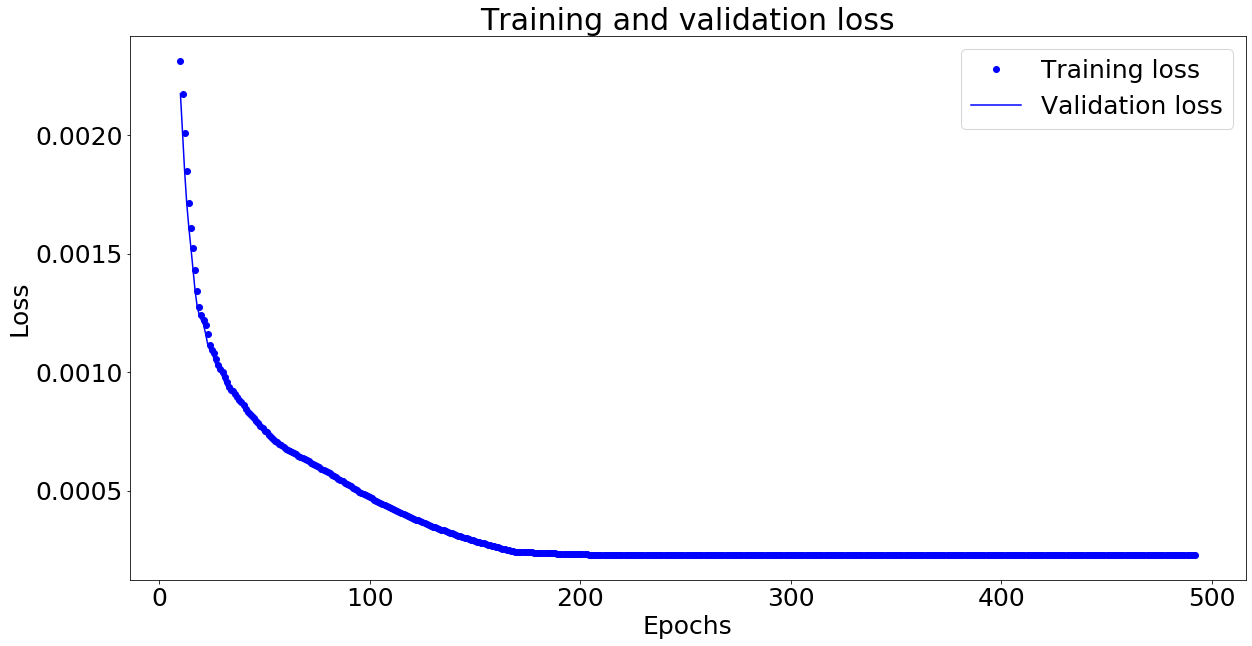

In [39]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(10, len(loss_values)+1)
plt.plot(epochs, loss_values[9:], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values[9:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 25})
#plt.savefig('../small_output/small_loss_figure', quality=95)
plt.show()


In [57]:
labels.shape

(60, 40)

In [61]:
print(labels[0,:])

[0.         0.         0.         0.         0.         0.
 0.00150867 0.         0.         0.00485445 0.11199791 0.2183146
 0.27290389 0.25221989 0.13820058 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [63]:
print(labels[1,:])

[0.         0.001707   0.         0.         0.0373564  0.00169198
 0.         0.05012491 0.03805353 0.03238619 0.09577754 0.14178702
 0.16830272 0.1694804  0.14329916 0.09162841 0.01951848 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00888627]


In [64]:
data.shape

(60, 32)

In [66]:
print(data[:1, :])

[[ 0.23115935  0.28512635  0.18379866  0.1426964   0.07472693 -0.03947194
  -0.21686249 -0.21493618 -0.42969269 -0.46146911 -0.4317065  -0.54437877
  -0.65811957 -0.56168652 -0.66742858 -0.57457171 -0.70558987 -0.63626
  -0.66146357 -0.73231493 -0.64646818 -0.72846885 -0.68680456 -0.64387594
  -0.62162481 -0.63440888 -0.60608574 -0.71264819 -0.68610075 -0.63725295
  -0.64027806 -0.66405233]]


In [67]:
data

array([[ 0.23115935,  0.28512635,  0.18379866, ..., -0.63725295,
        -0.64027806, -0.66405233],
       [ 1.02405856,  1.05070786,  0.9489841 , ..., -0.40791469,
        -0.51981919, -0.47680971],
       [ 0.579154  ,  0.36834173,  0.50042712, ..., -0.7246199 ,
        -0.67313048, -0.64202379],
       ...,
       [ 0.75094883,  0.77887095,  0.69172348, ..., -0.4406773 ,
        -0.53077   , -0.55390961],
       [ 1.63194795,  1.83848013,  1.76694096, ..., -0.52804426,
        -0.57457322, -0.60898097],
       [ 1.56587301,  1.51671399,  1.37775181, ..., -0.73554077,
        -0.66217968, -0.66405233]])

In [64]:
# predictions and actual labels are pretty similar, so means there's relationshp between data, can learn something

In [69]:
# pred on first row of data (and then compare with first NNLS labels):
predictions = model.predict(data[:1,:])

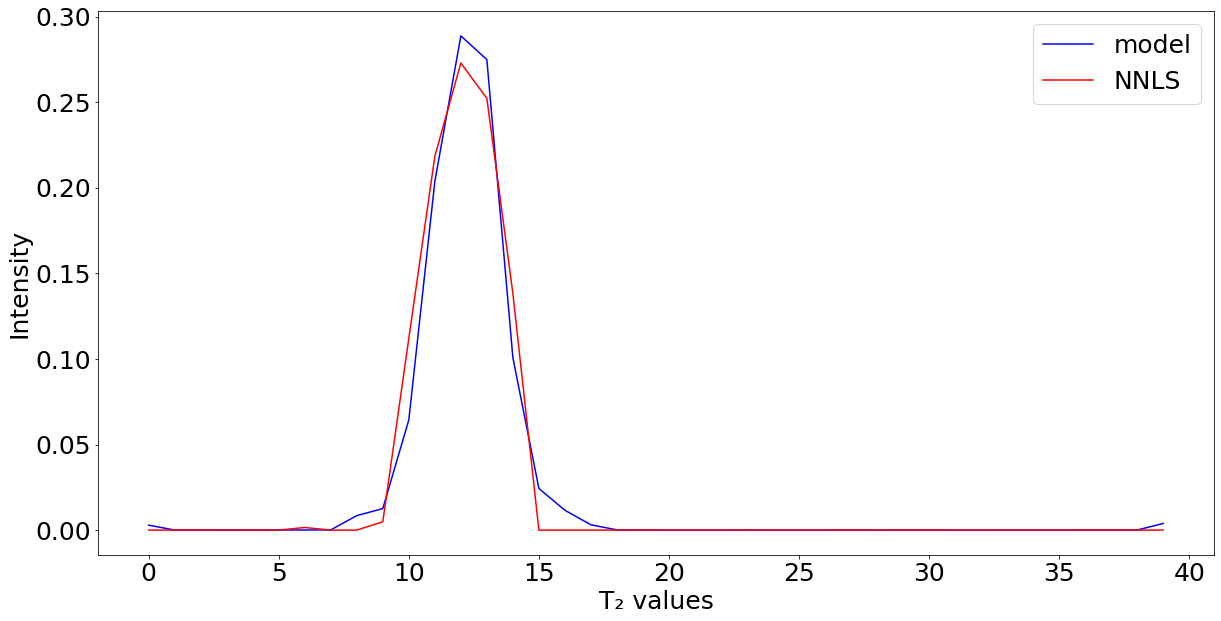

In [53]:
x = range(len(predictions[0]))
plt.plot(x, predictions[0], 'b', label='model')
plt.plot(x, labels[0,:], 'r', label='NNLS')
plt.xlabel('T\N{SUBSCRIPT TWO} values')
plt.ylabel('Intensity')
plt.legend()
plt.savefig('../small_output/small_overlay_plot', quality=95)
plt.show()


In [96]:
# try again to find an example that looks like our t2 spectrum (3 peaks)
predictions56 = model.predict(data[56:57,:])

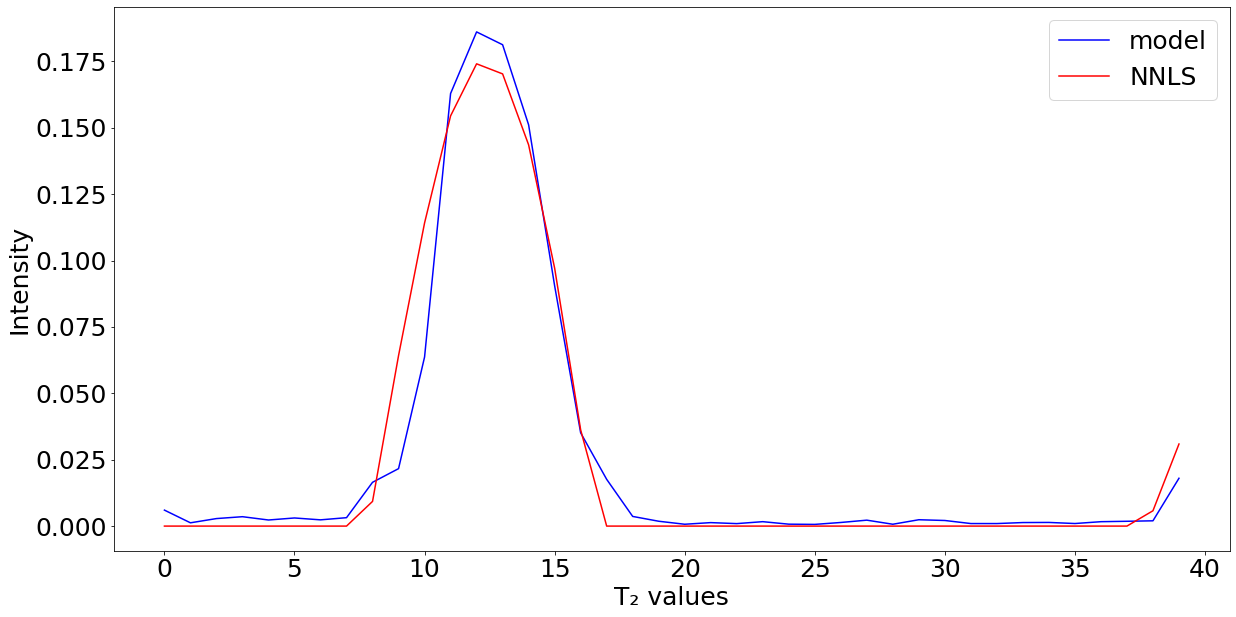

In [98]:
x = range(len(predictions56[0]))
plt.plot(x, predictions56[0], 'b', label='model')
plt.plot(x, labels[56,:], 'r', label='NNLS')
plt.xlabel('T\N{SUBSCRIPT TWO} values')
plt.ylabel('Intensity')
plt.legend()
plt.savefig('../small_output/small_overlay_plot_56', quality=95)
plt.show()


1


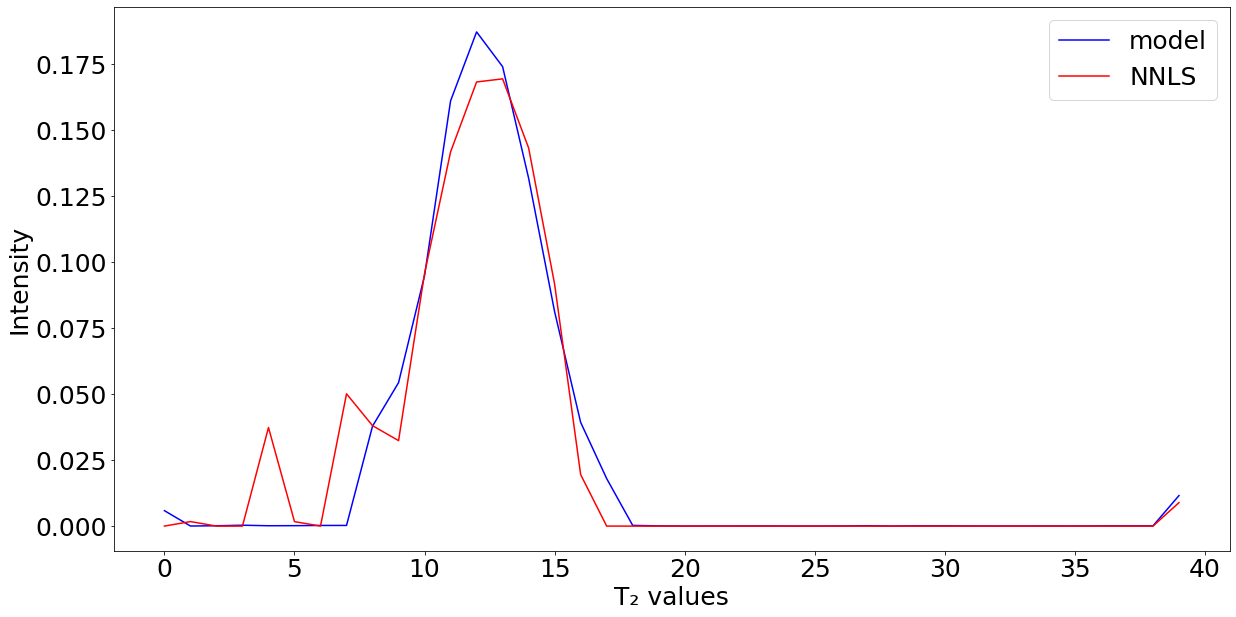

2


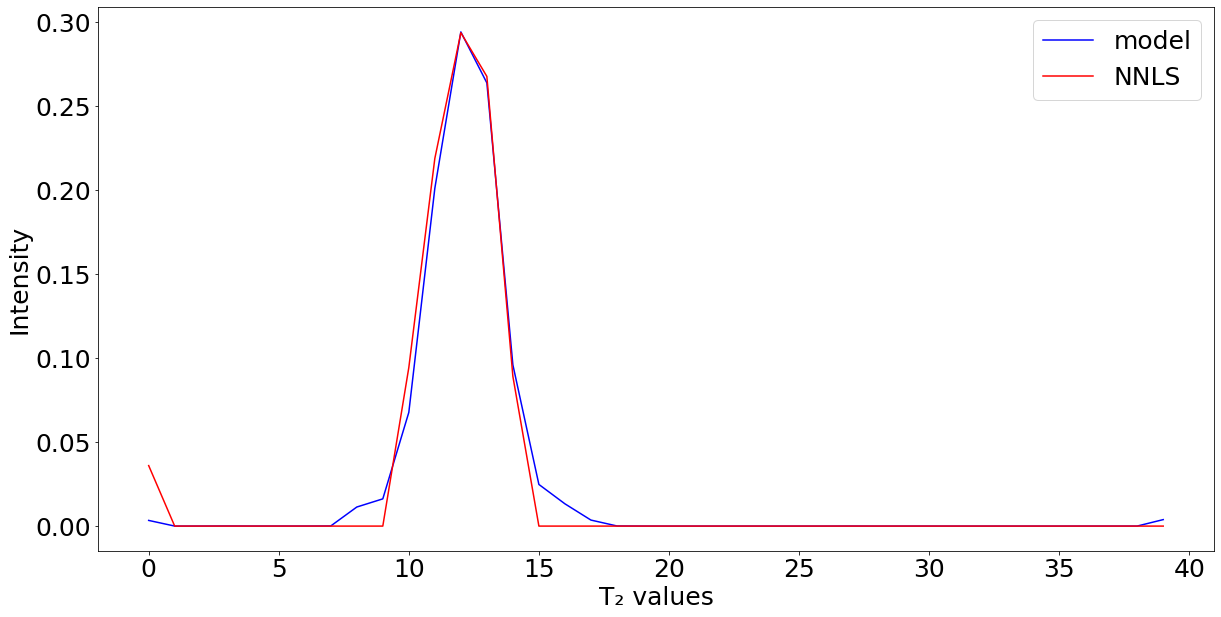

3


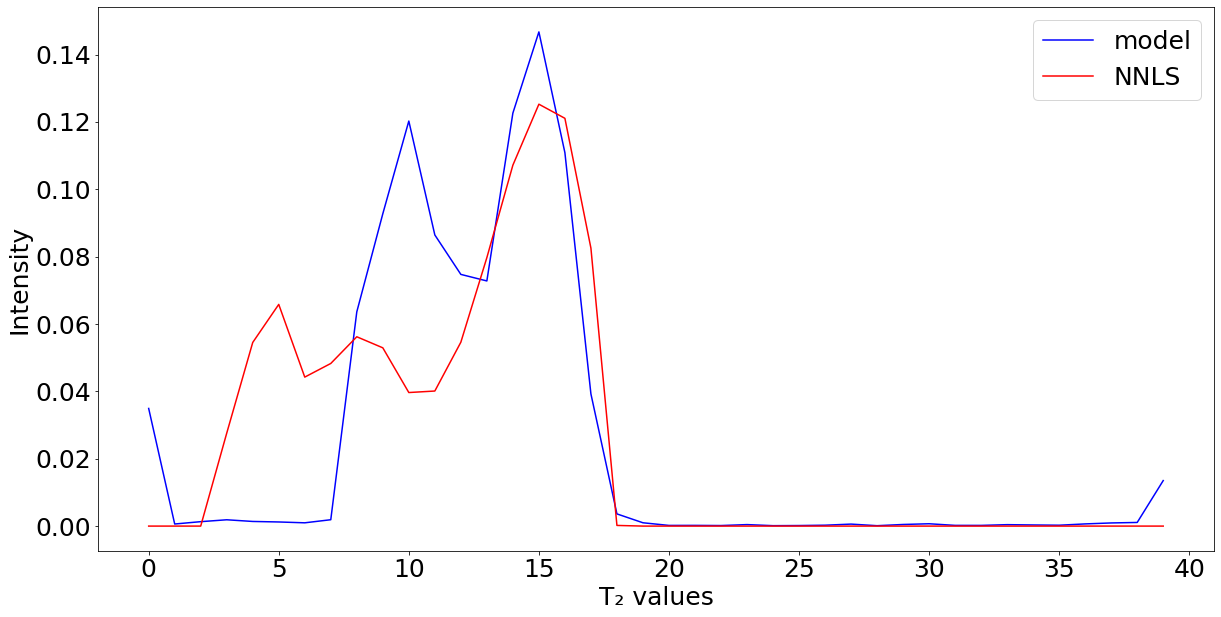

4


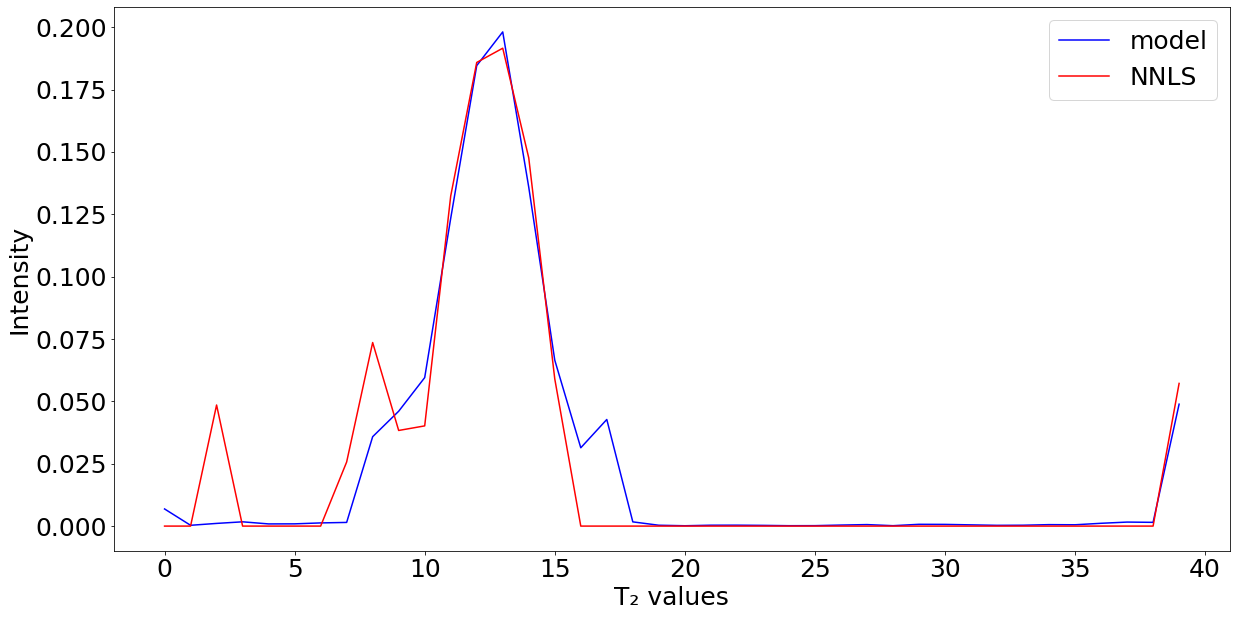

5


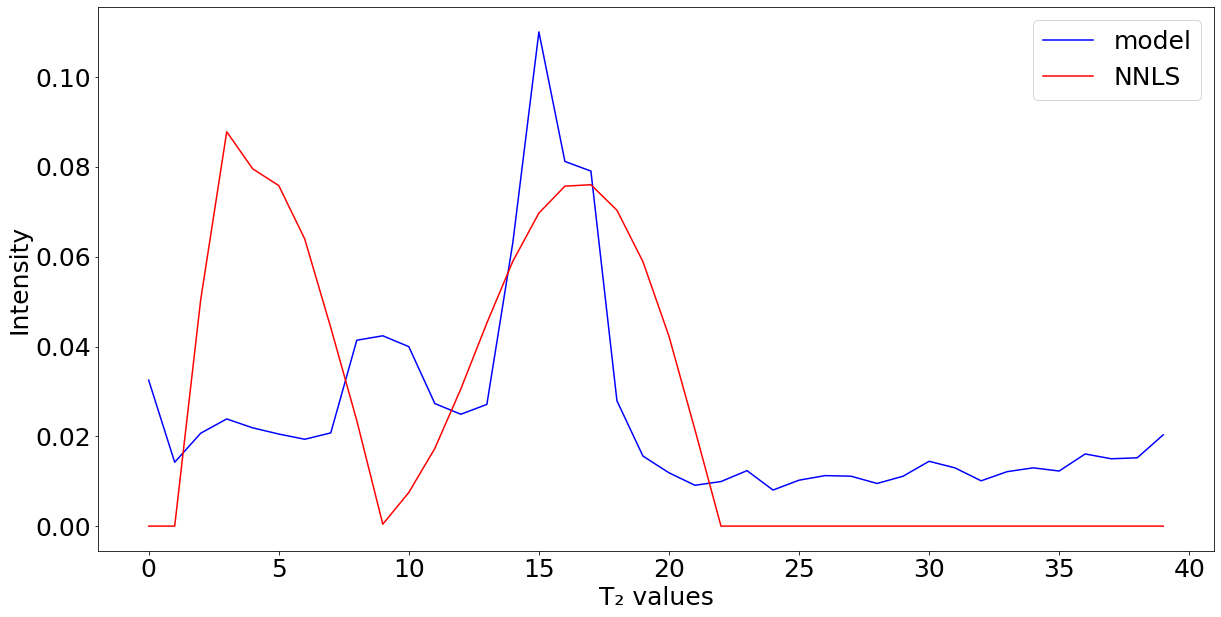

6


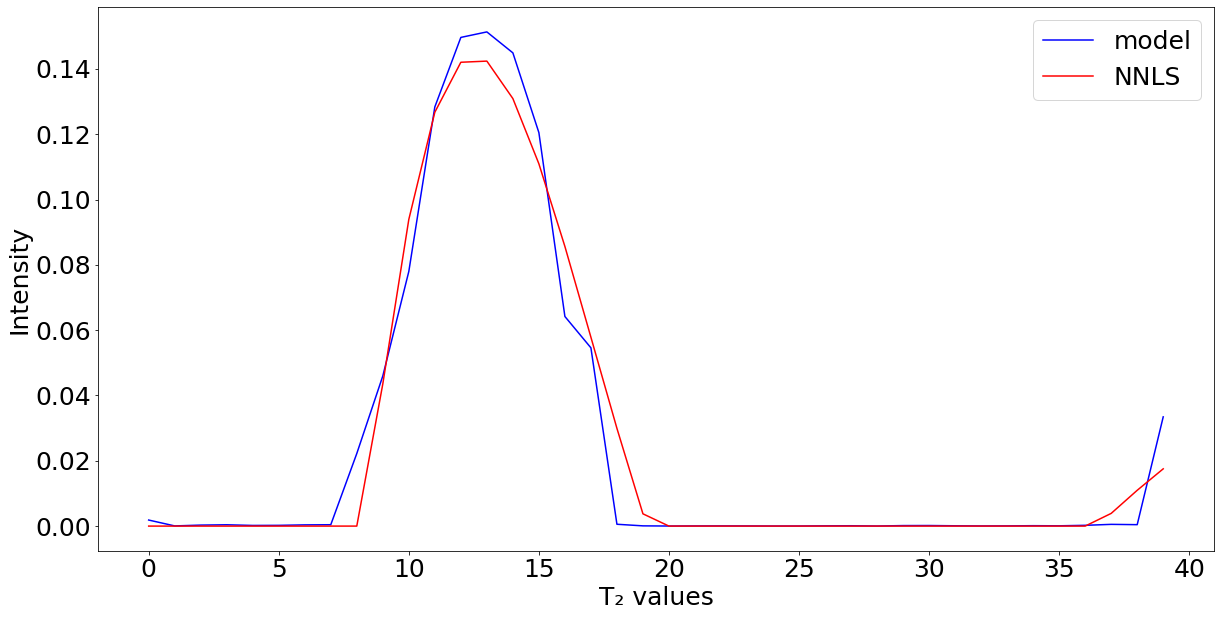

7


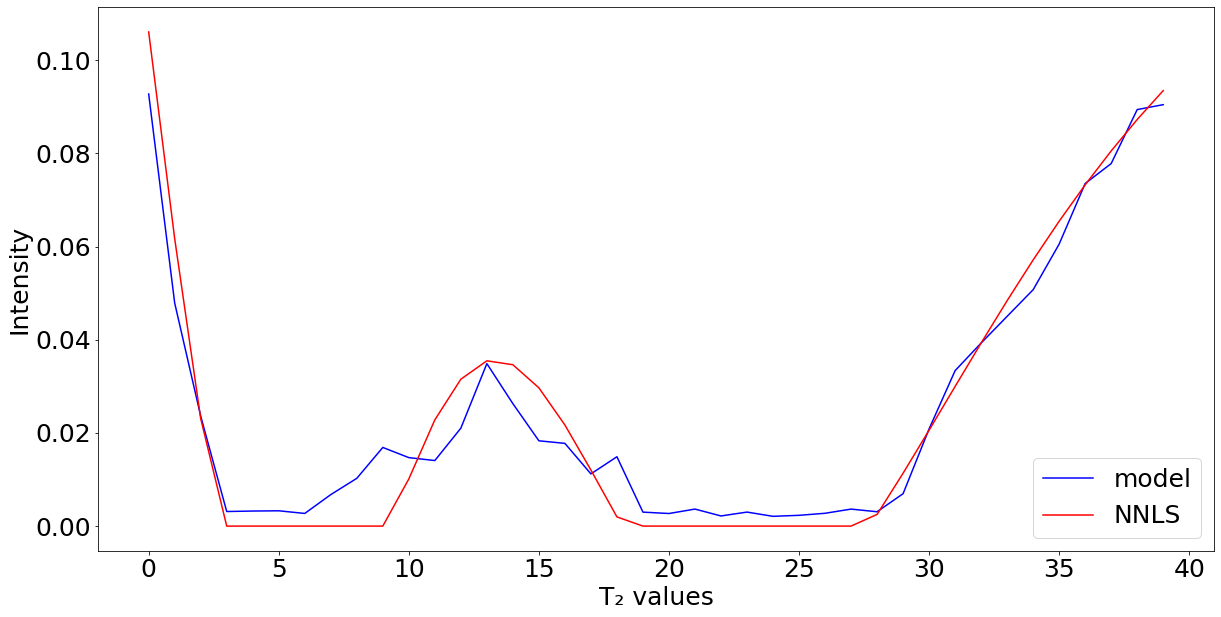

8


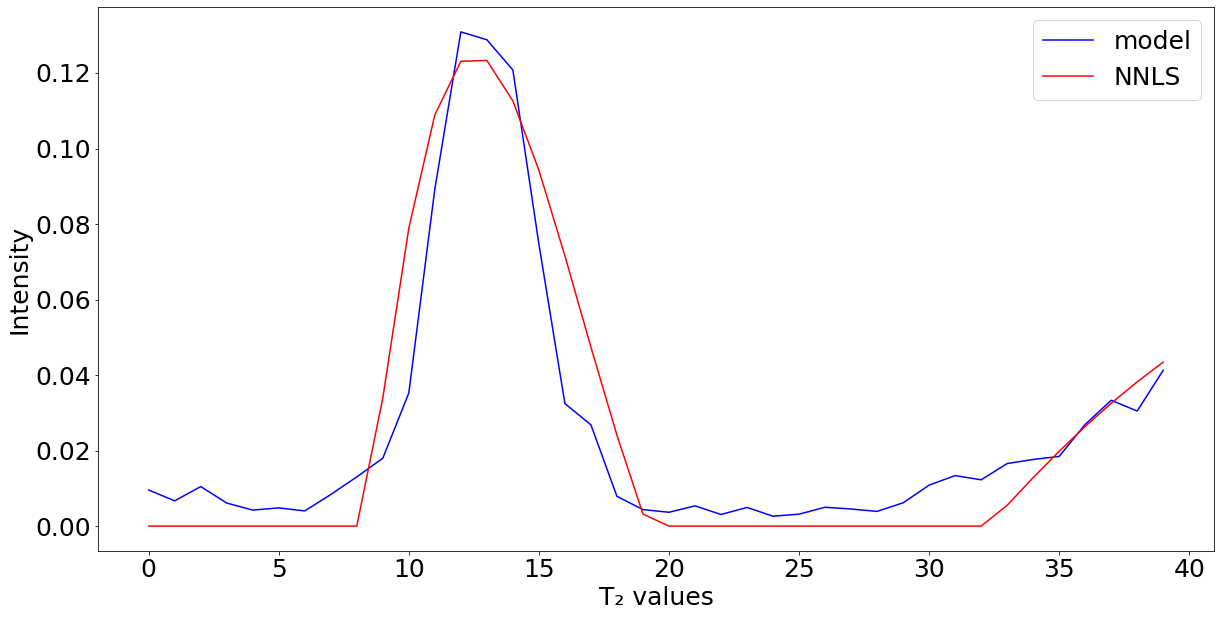

9


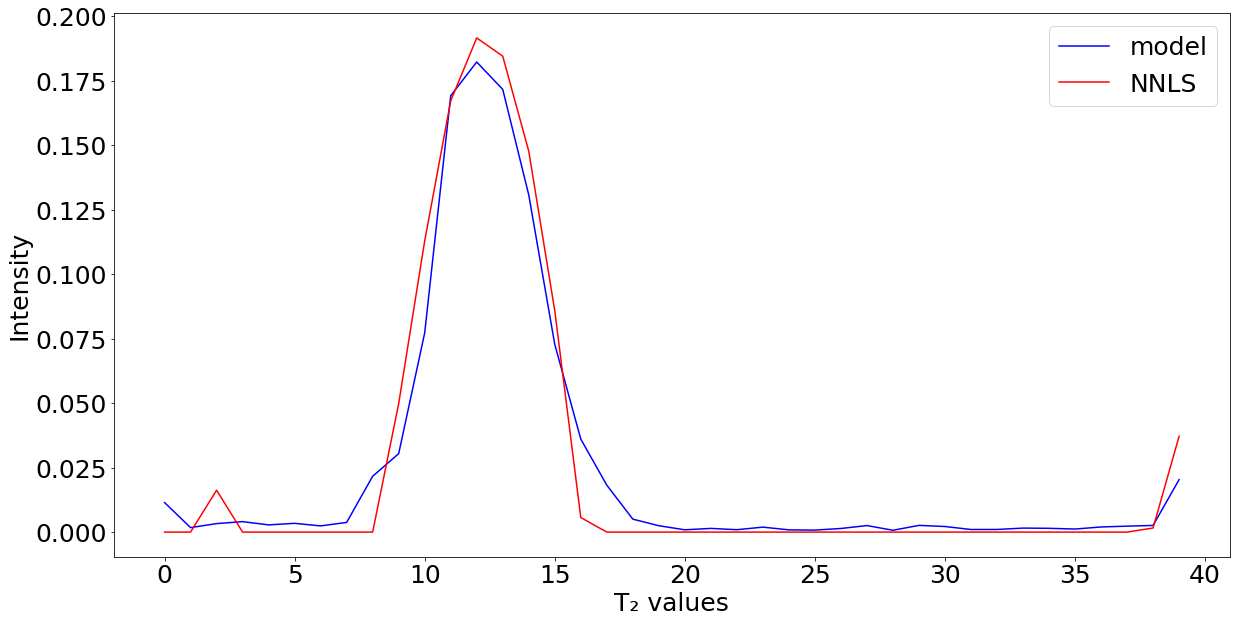

10


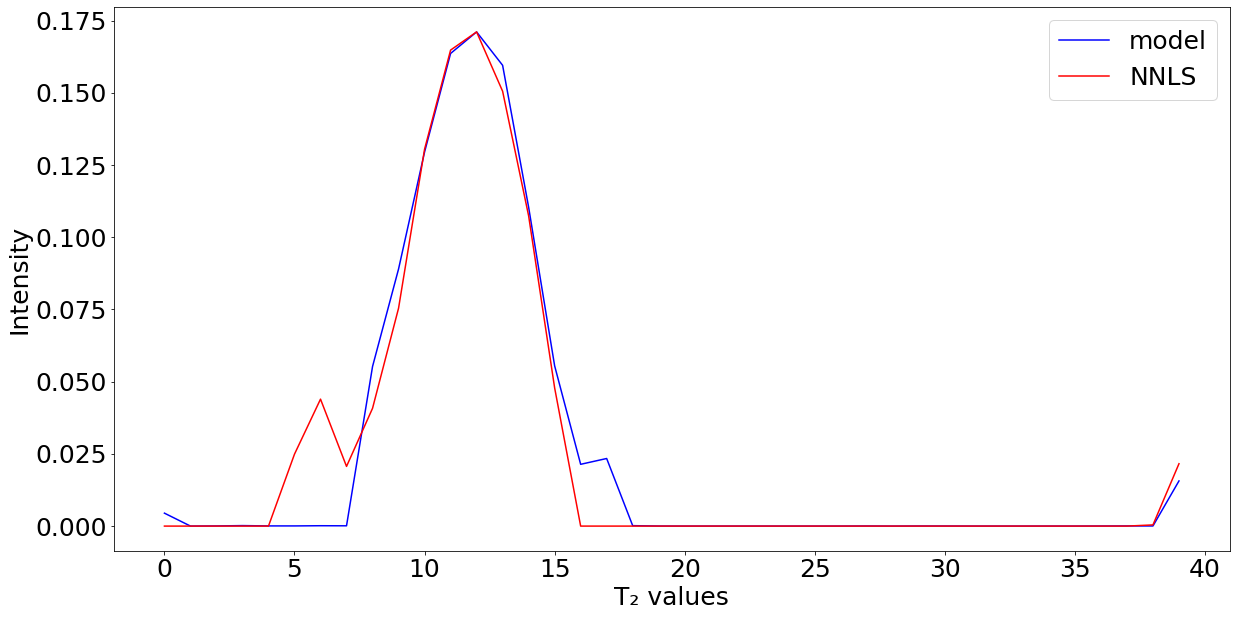

11


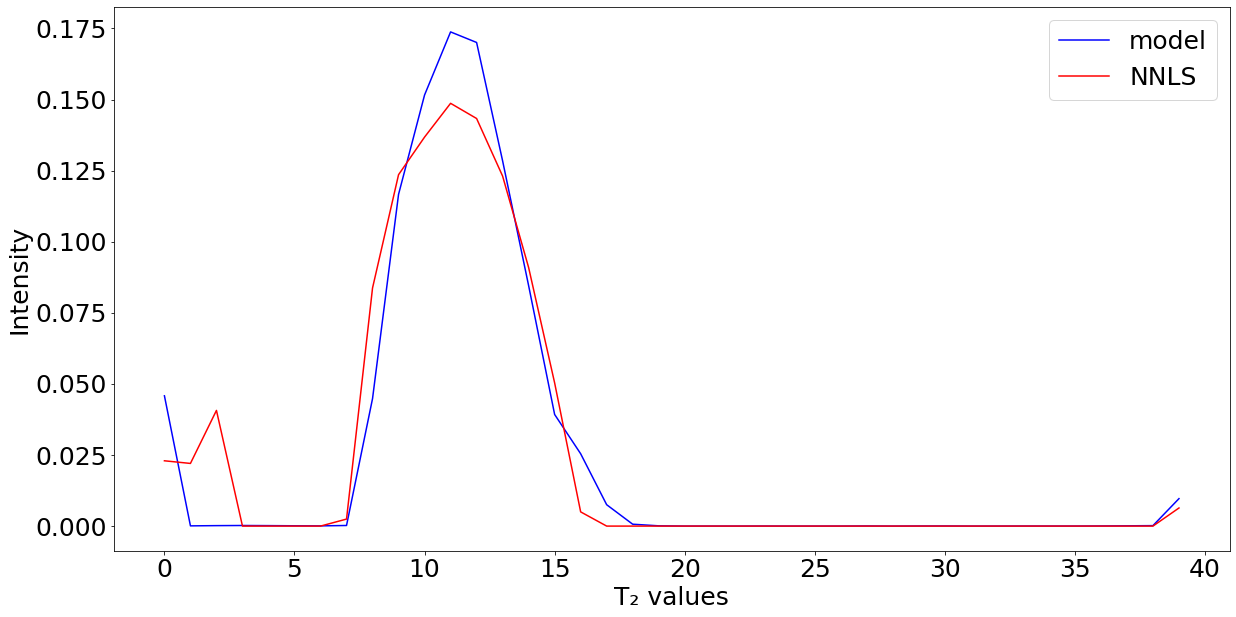

12


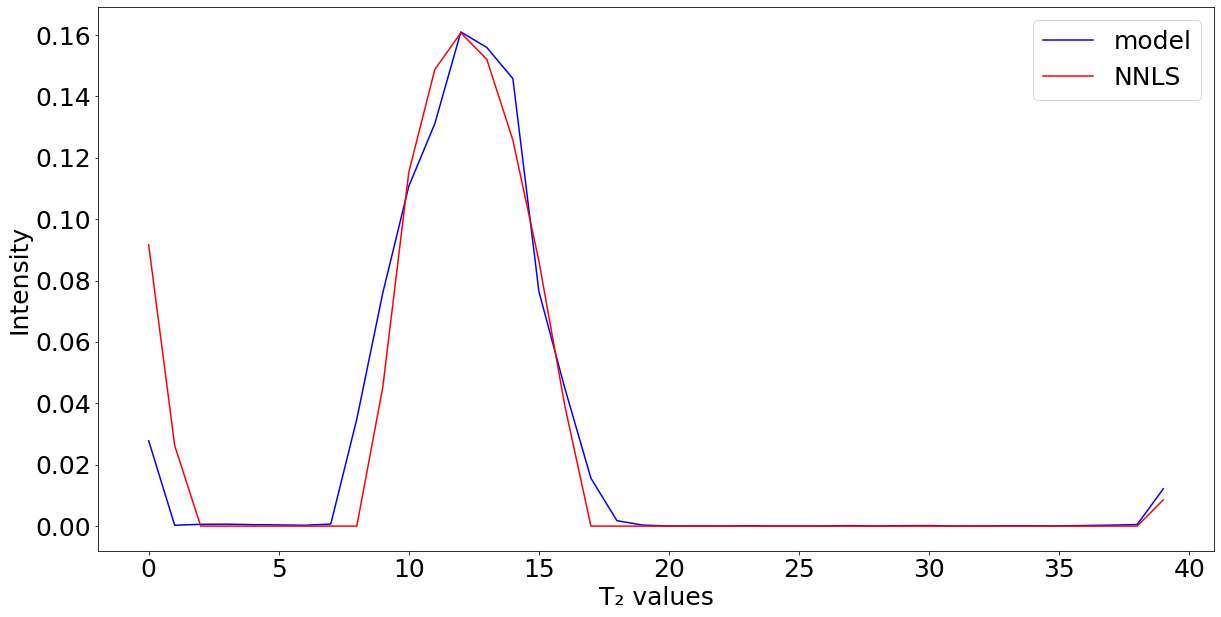

13


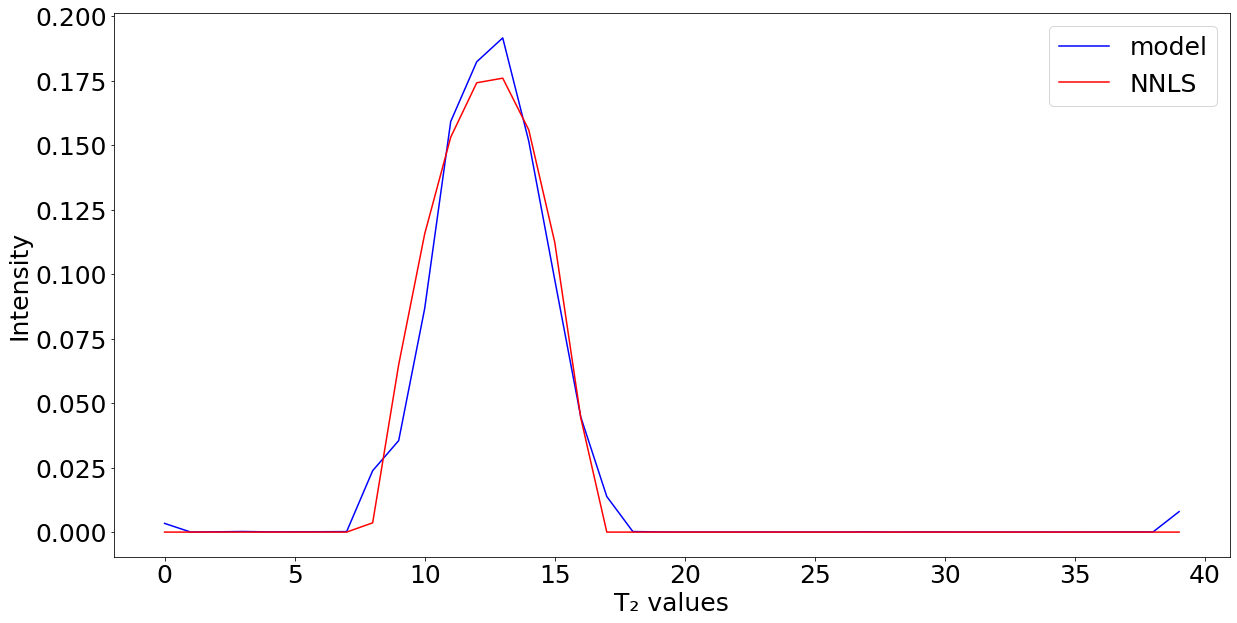

14


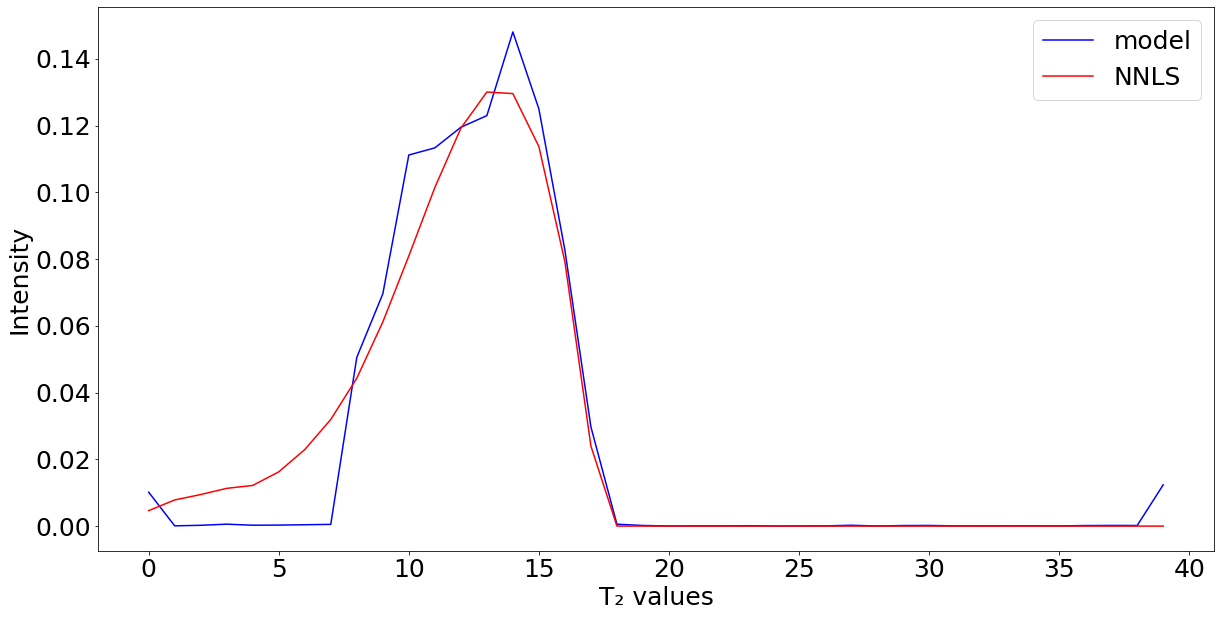

15


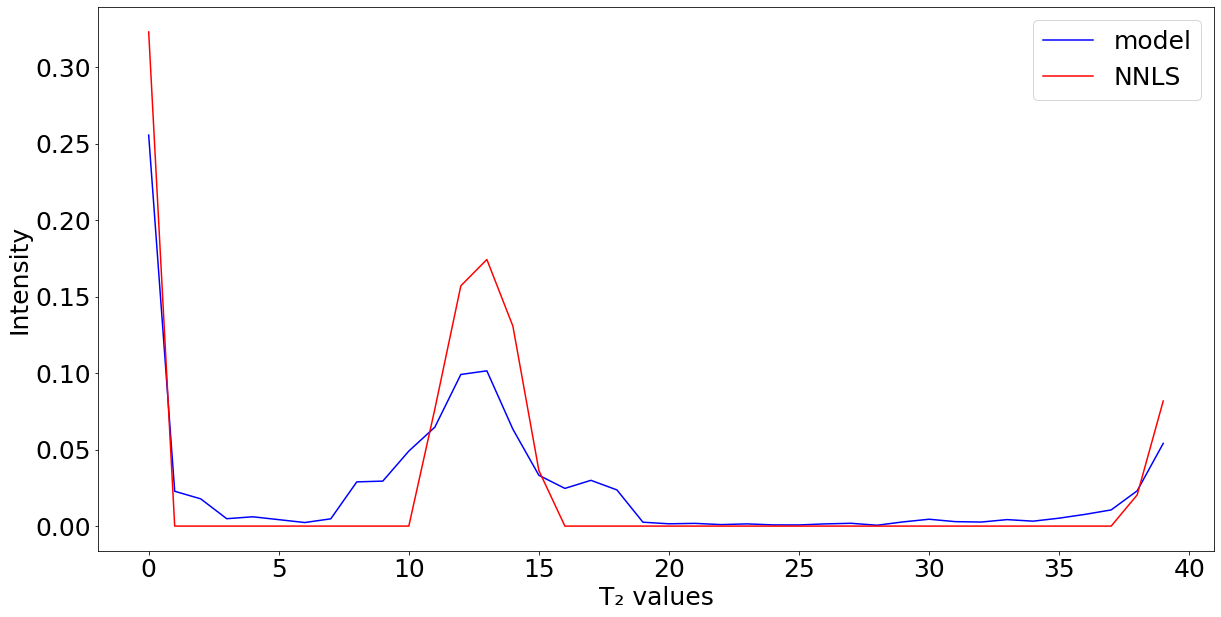

16


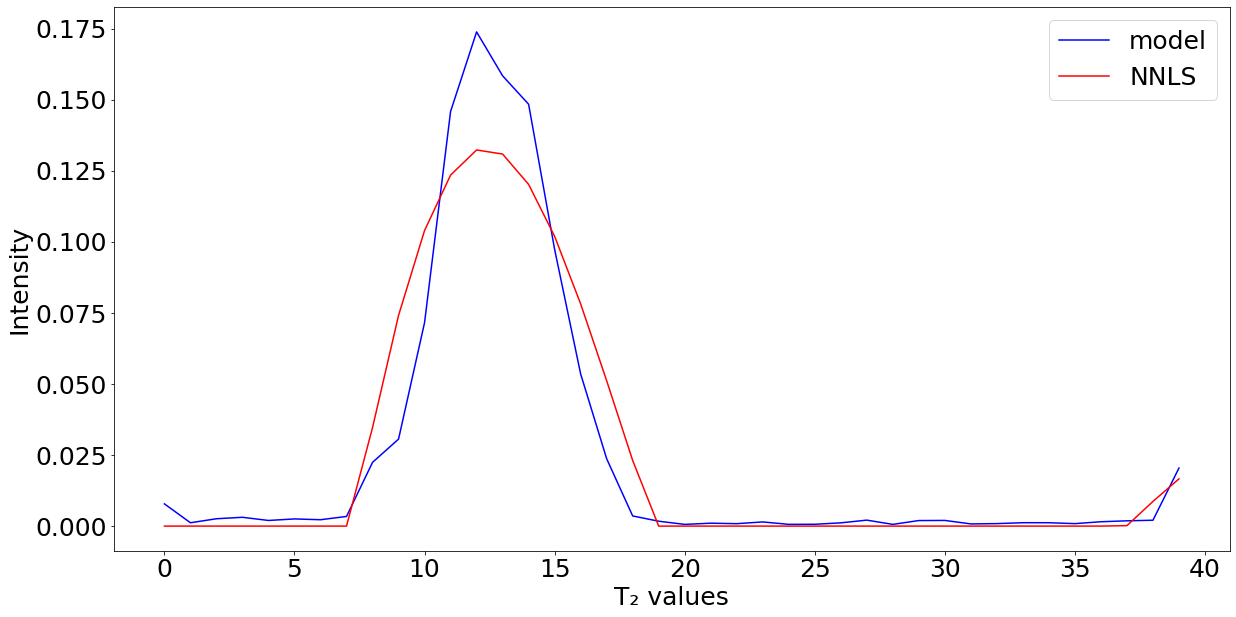

17


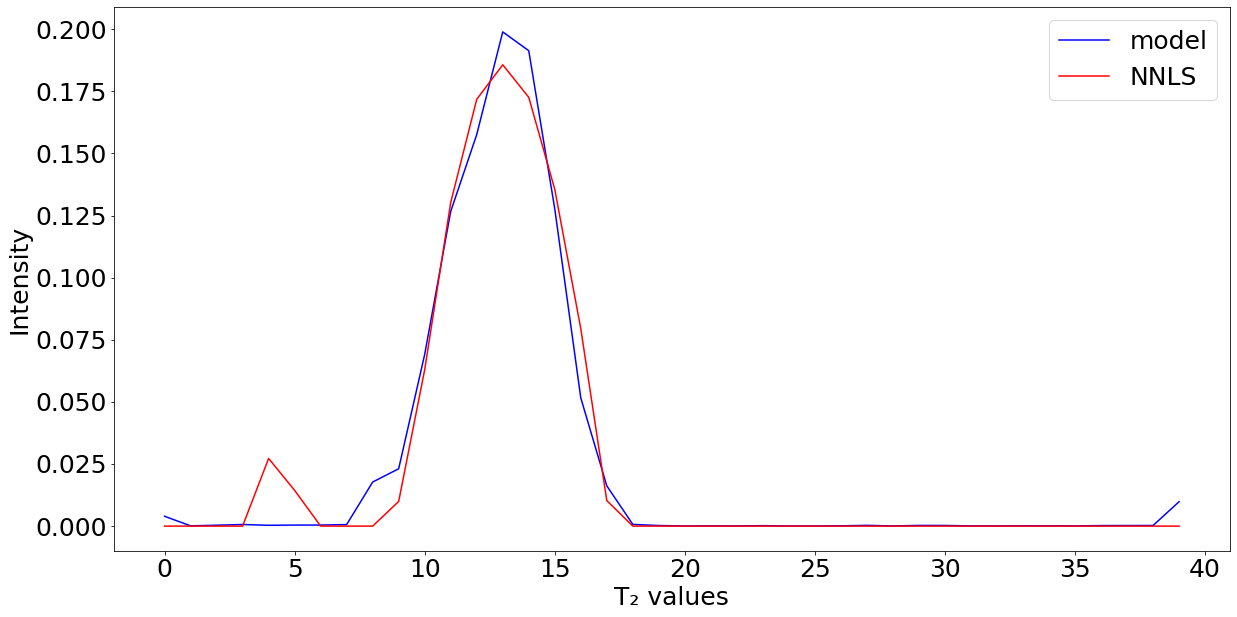

18


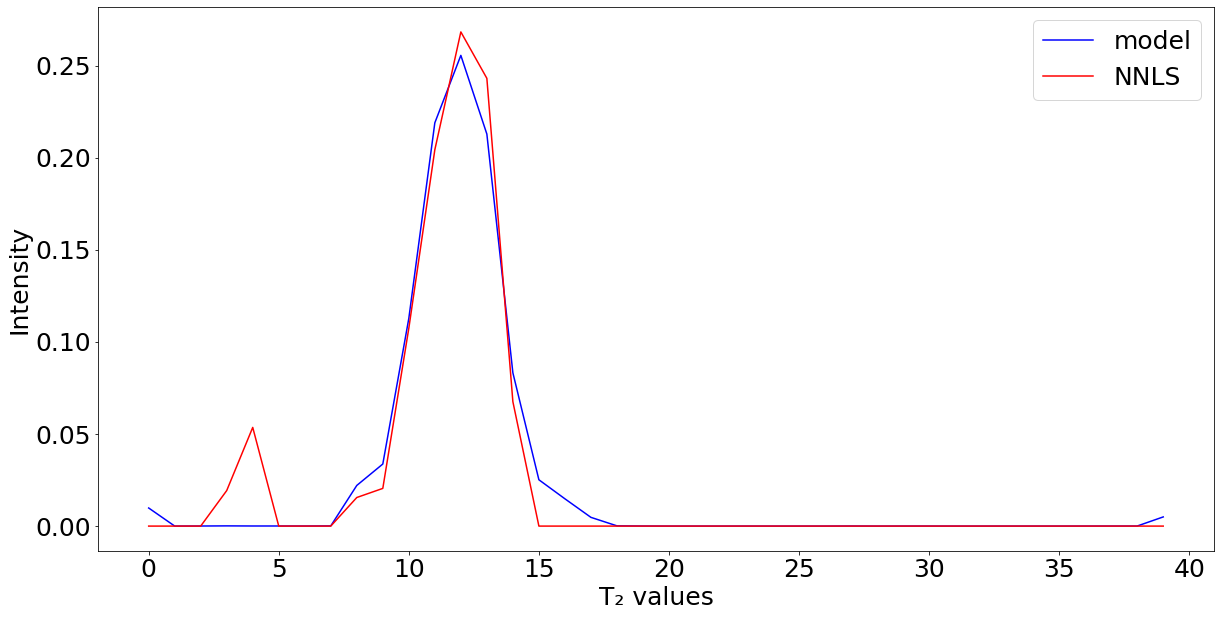

19


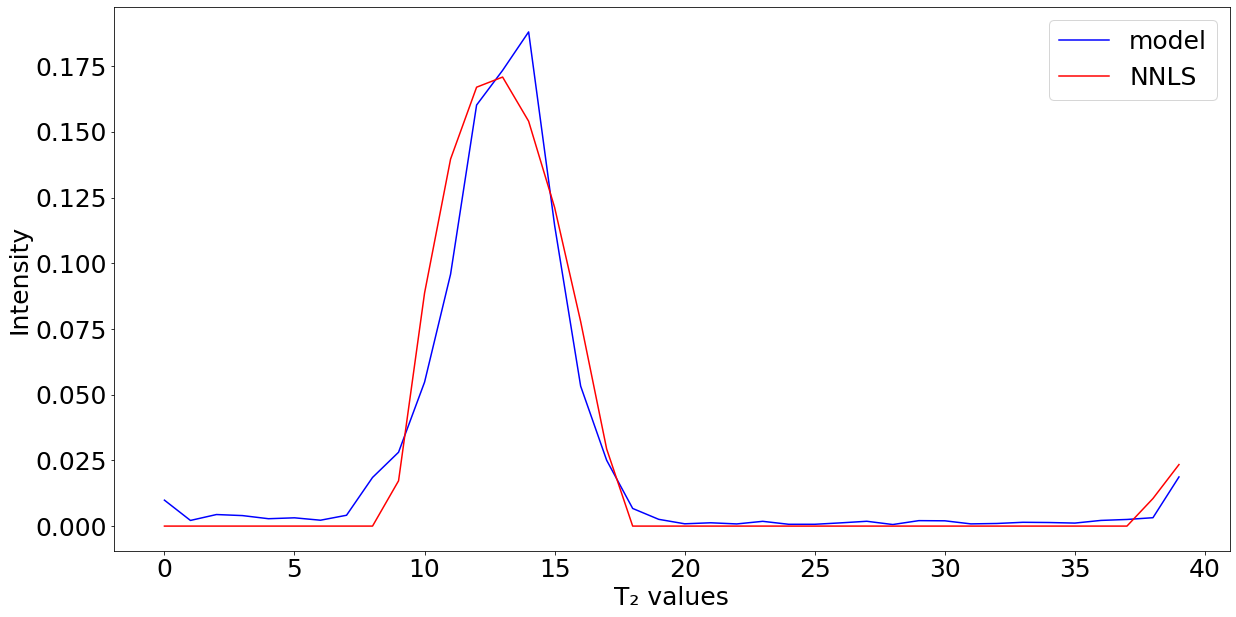

20


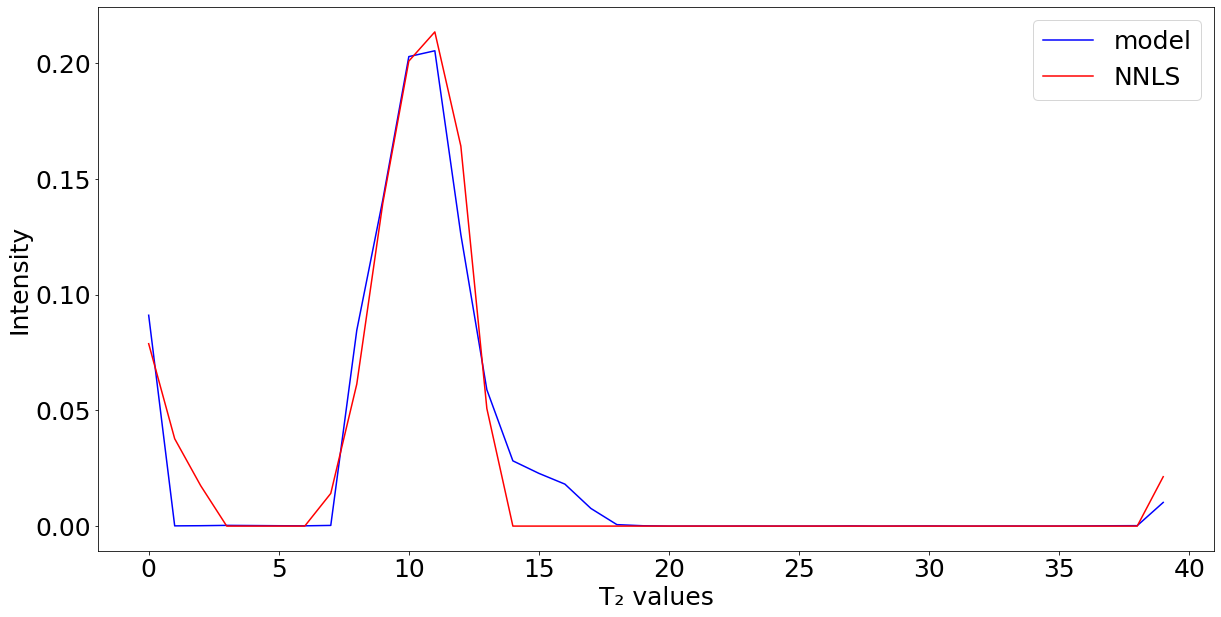

21


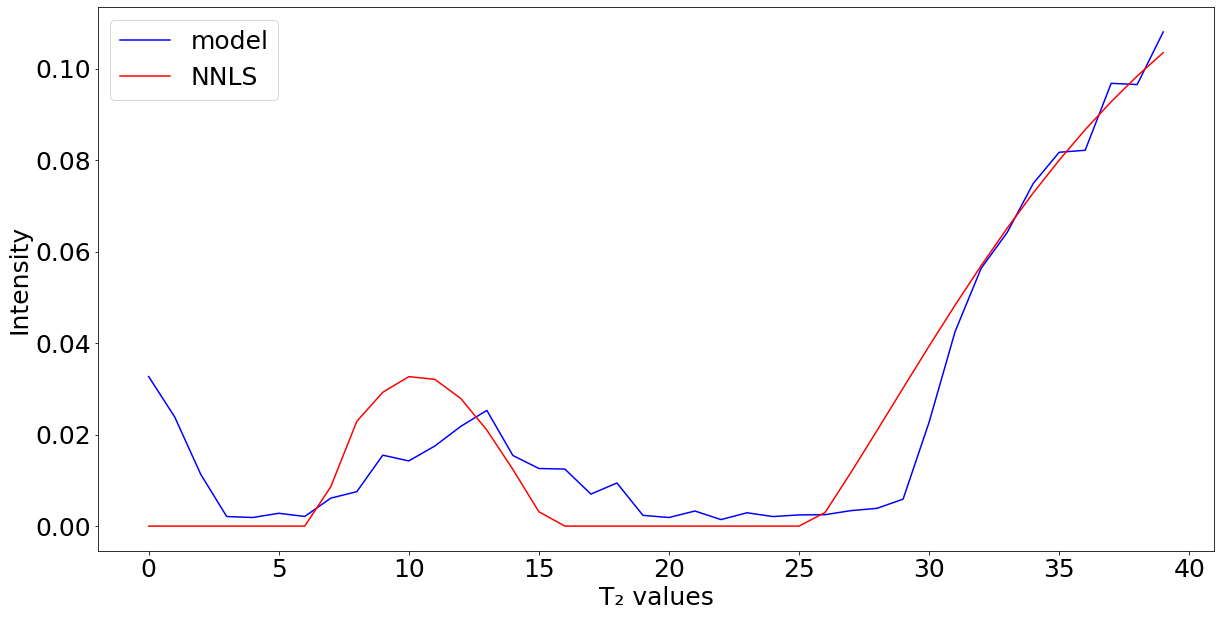

22


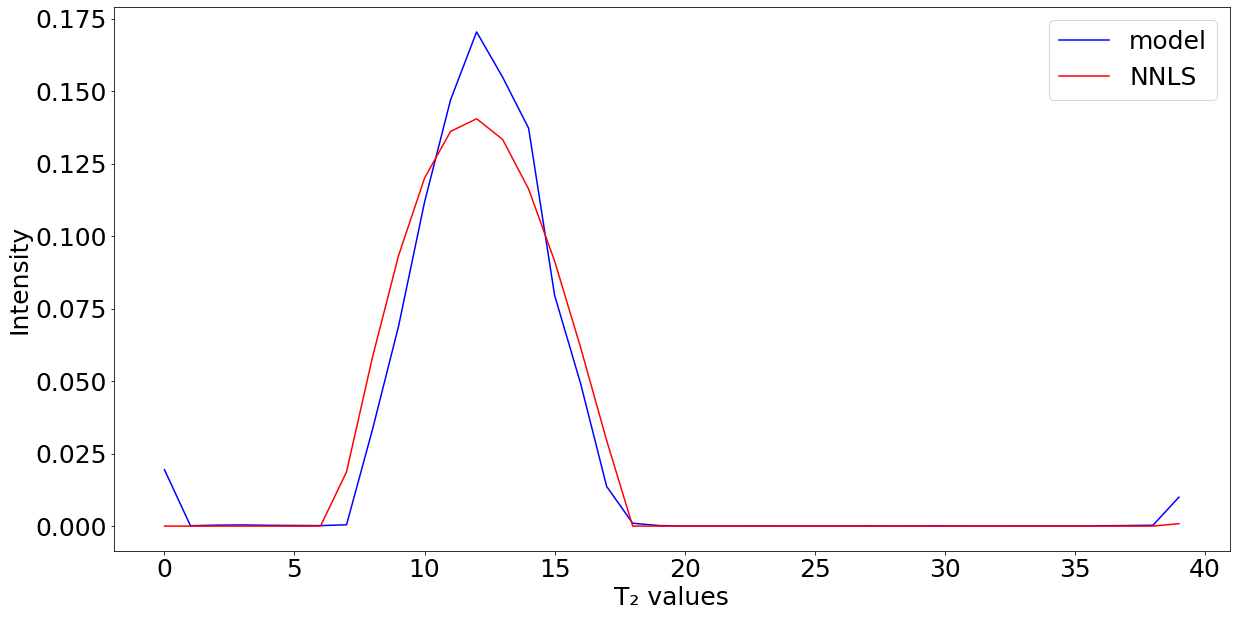

23


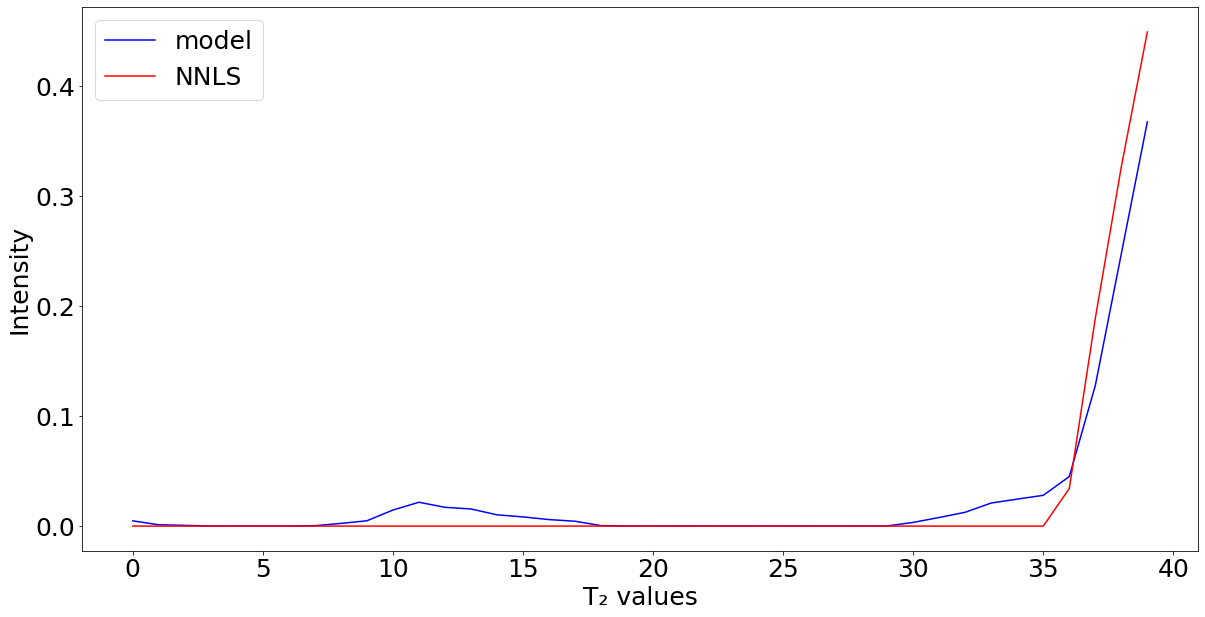

24


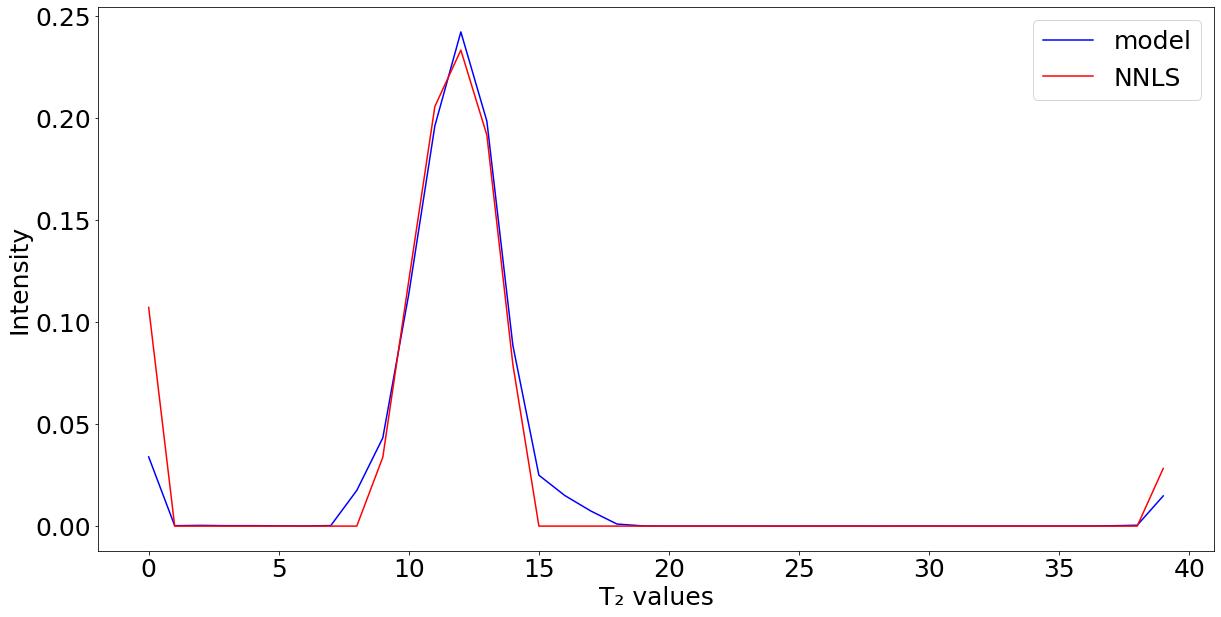

25


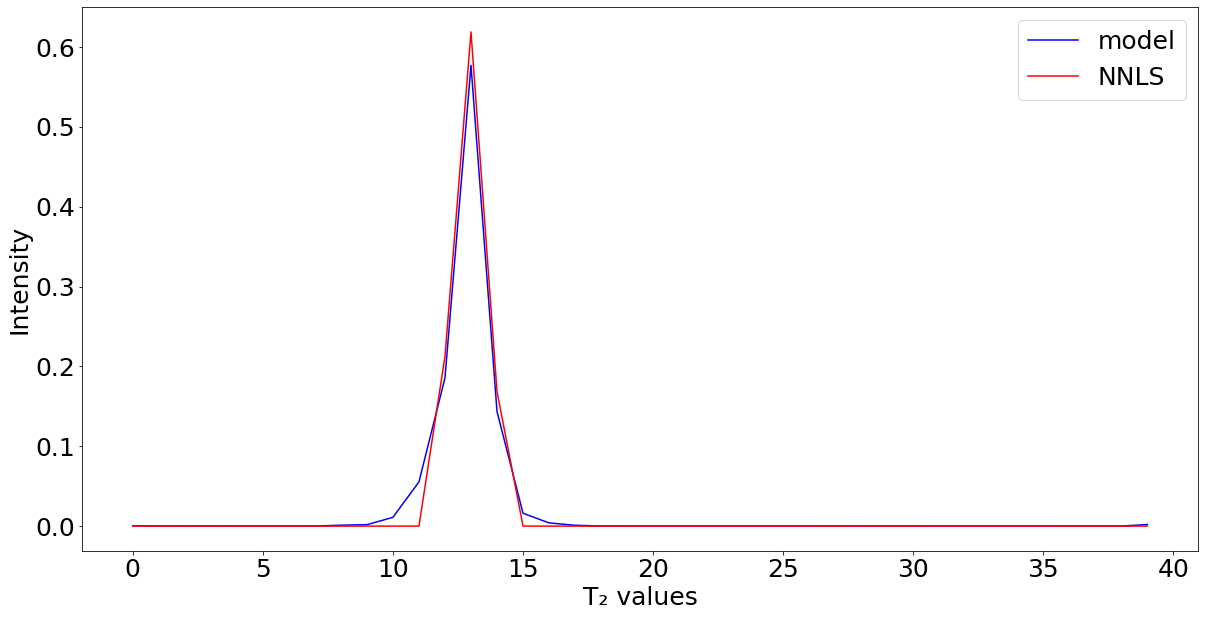

26


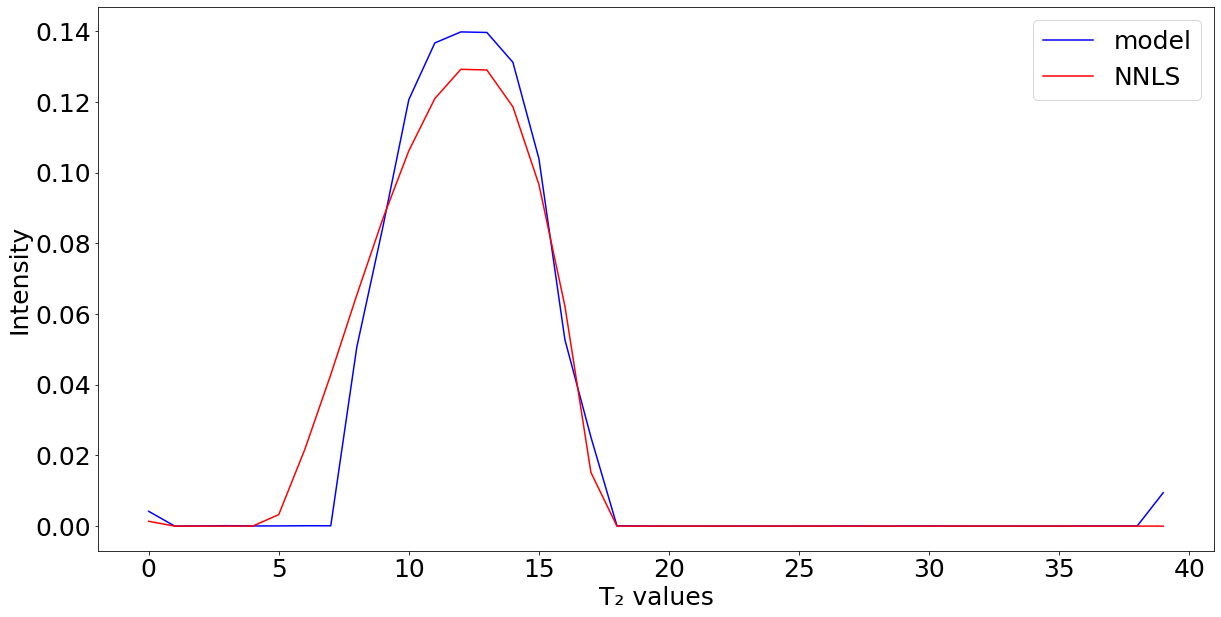

27


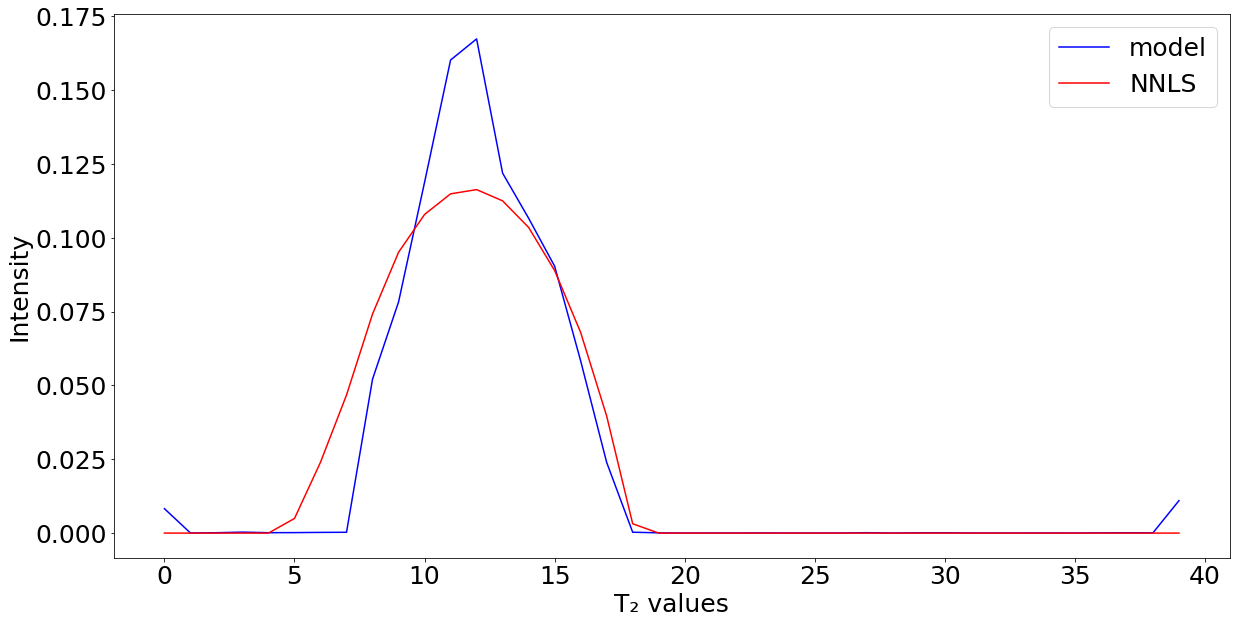

28


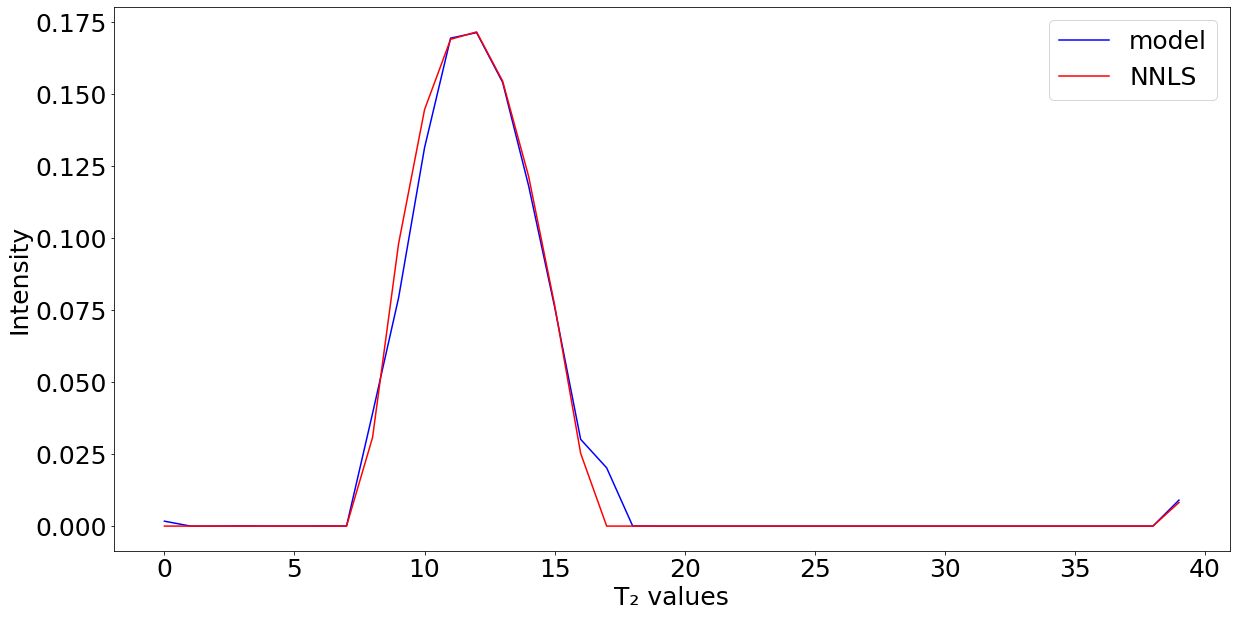

29


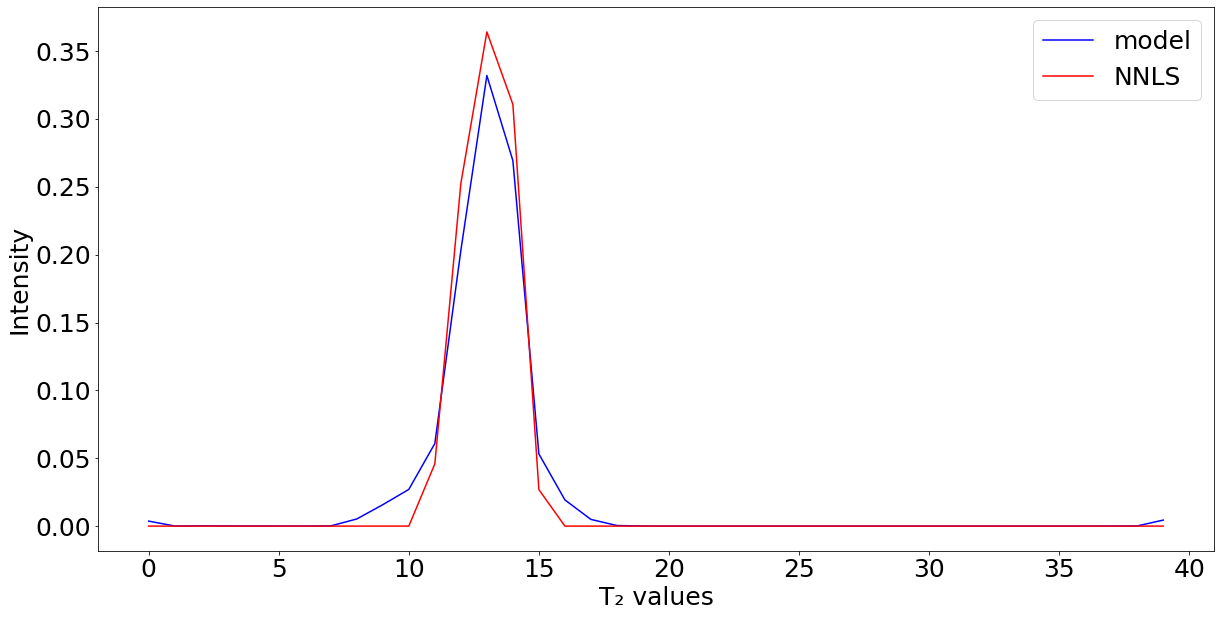

30


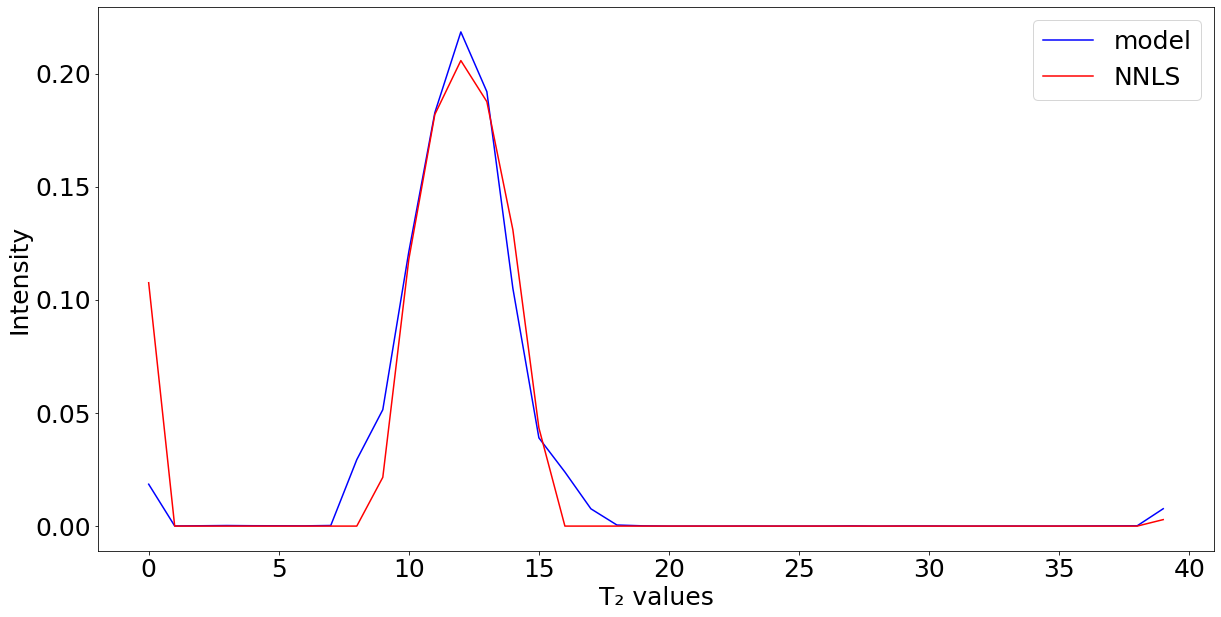

31


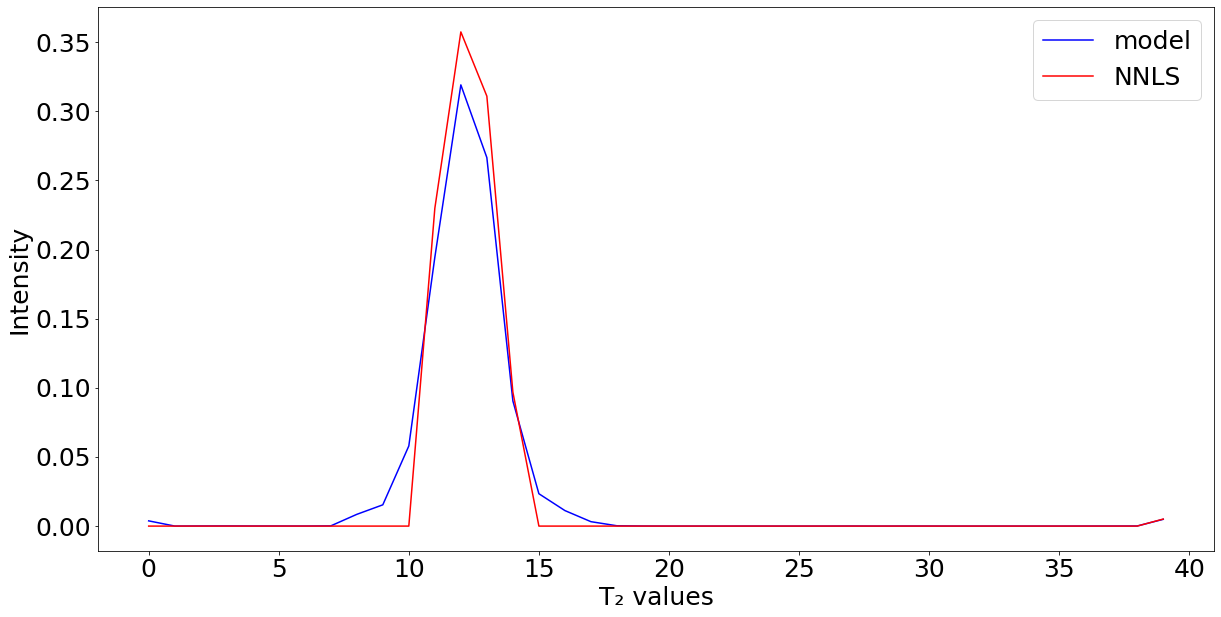

32


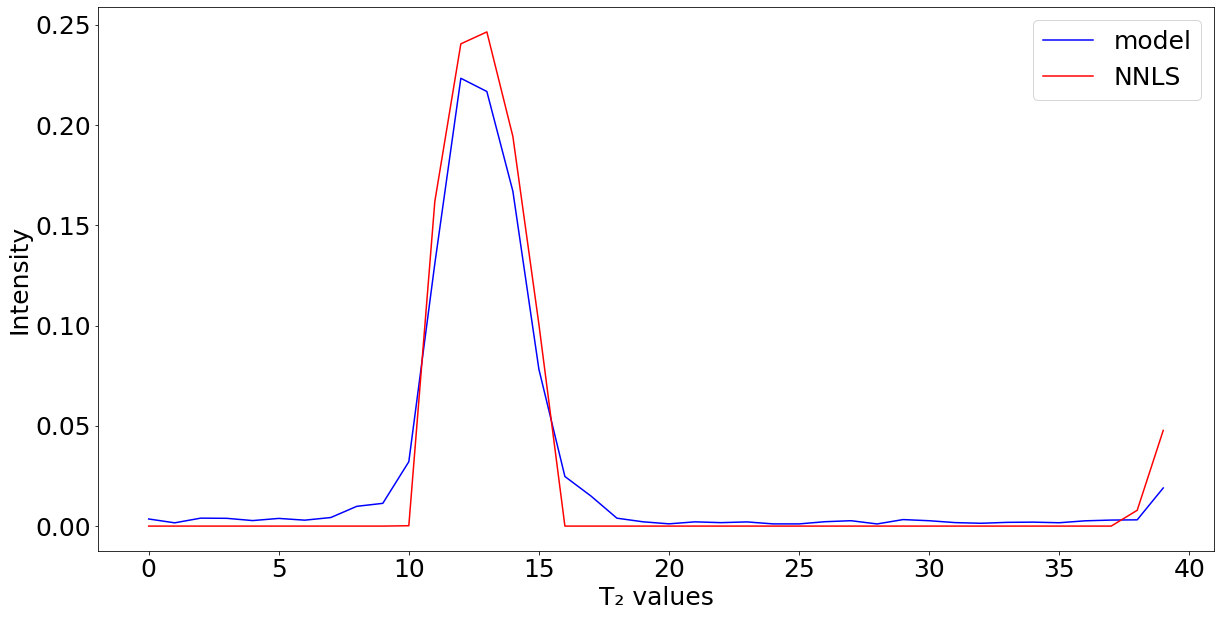

33


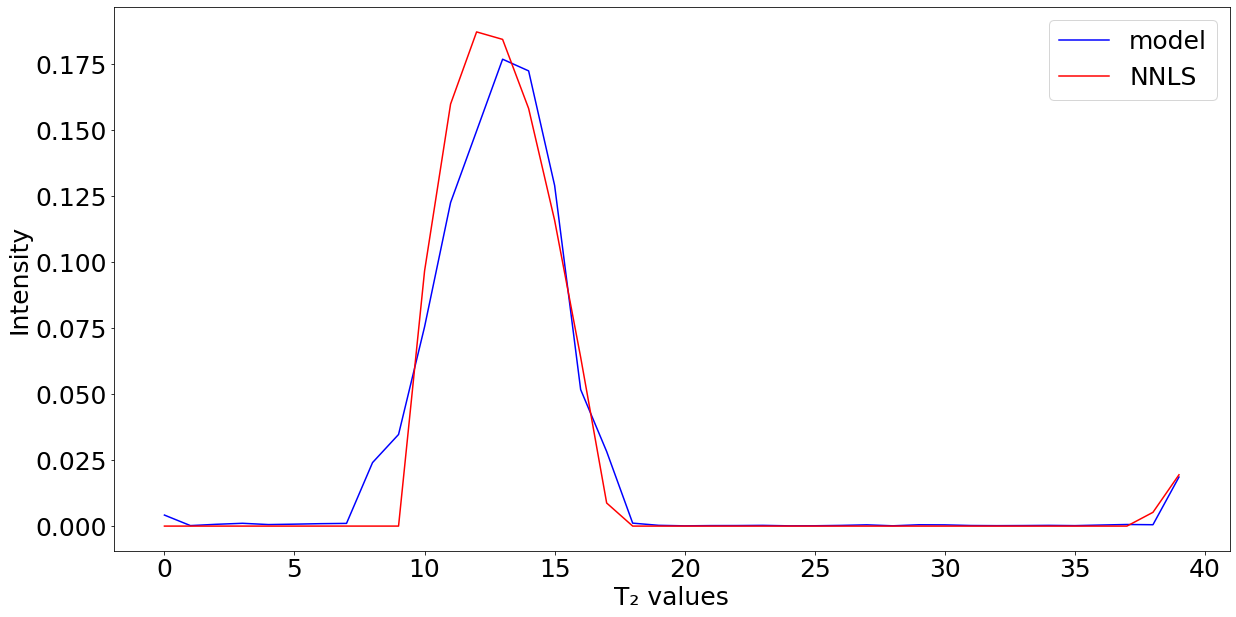

34


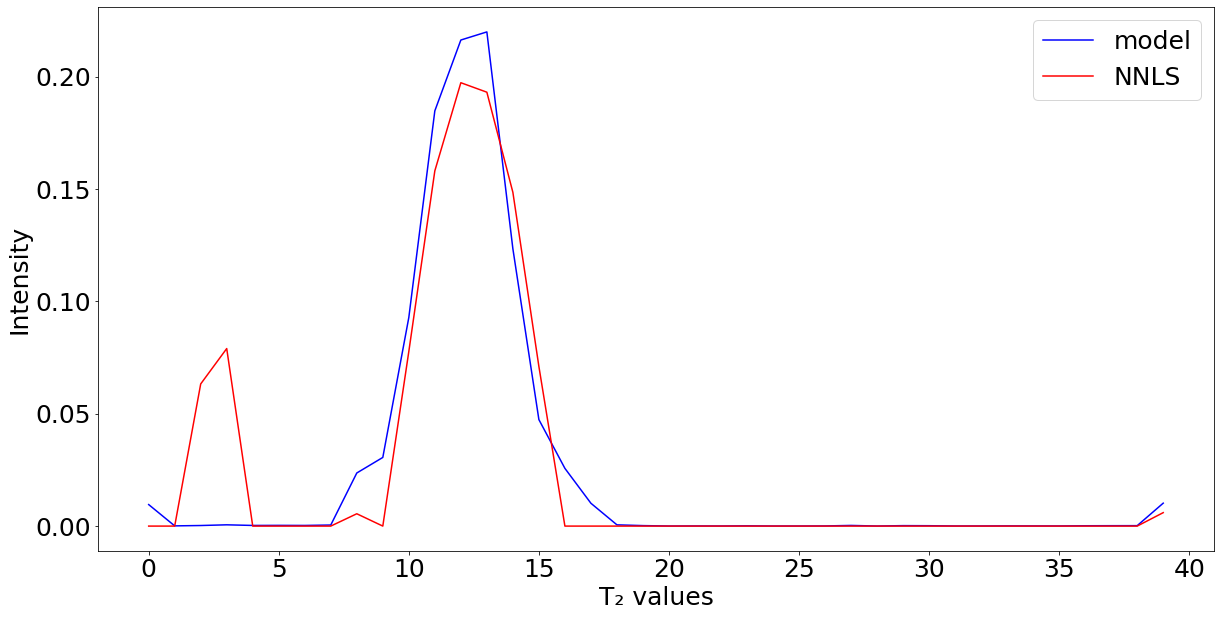

35


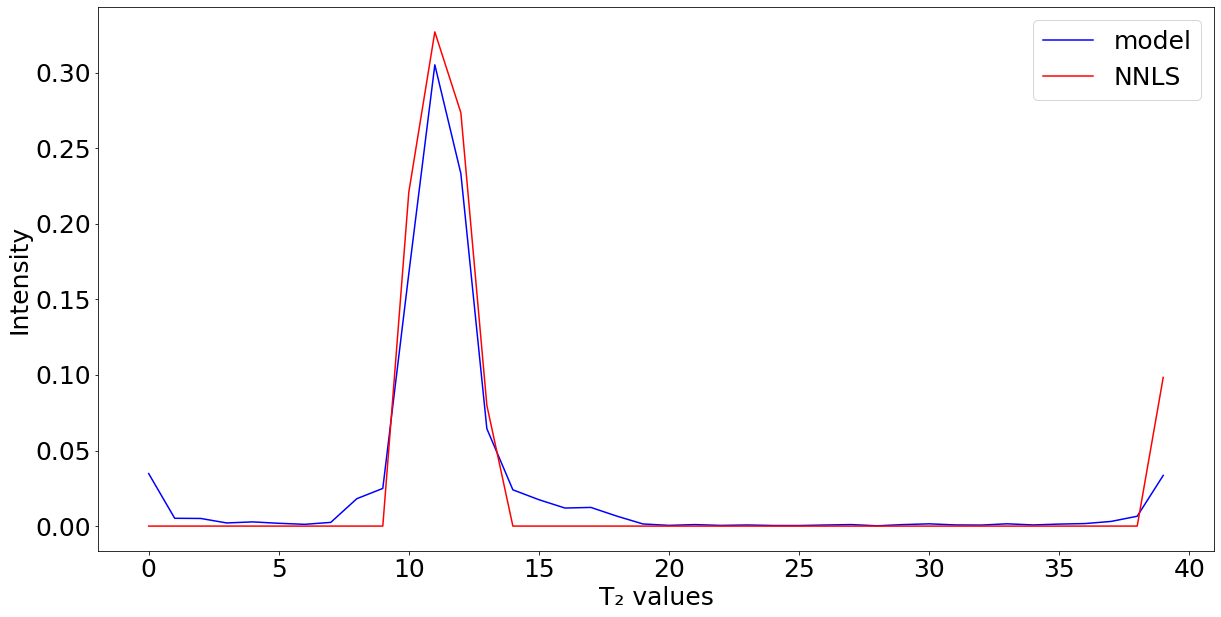

36


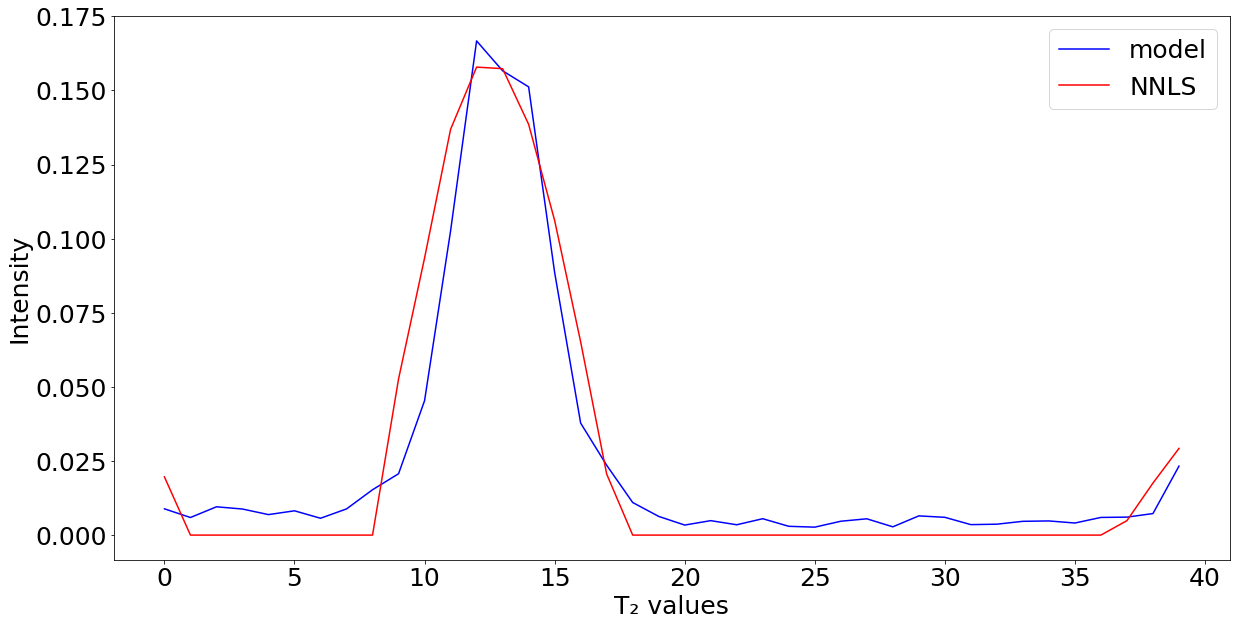

37


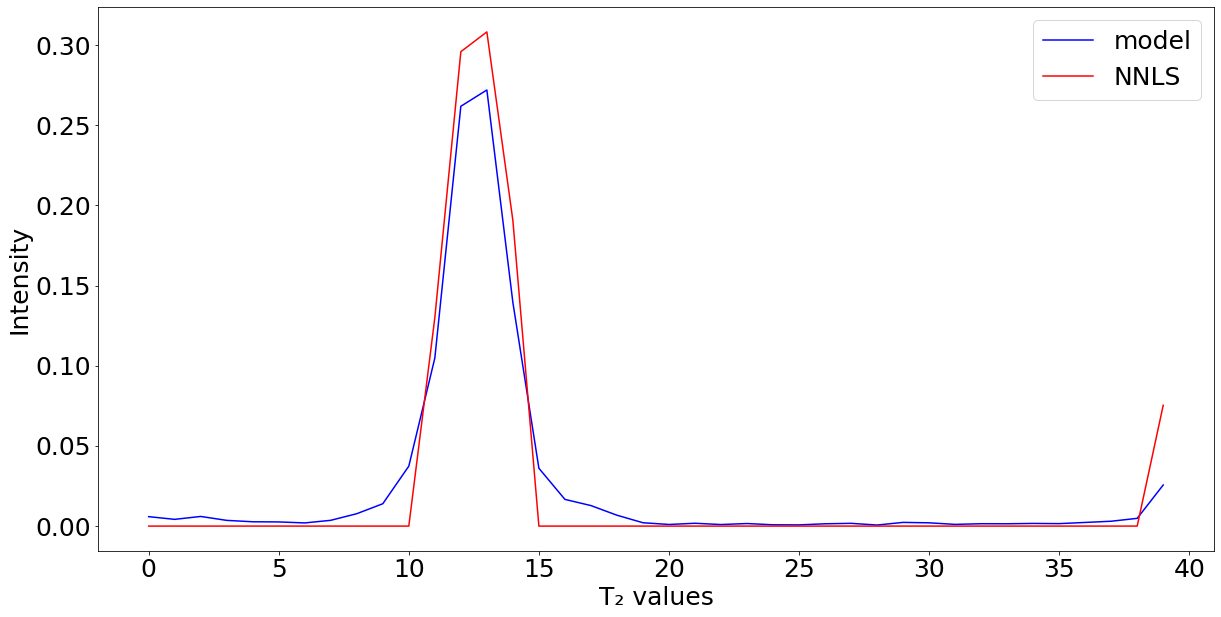

38


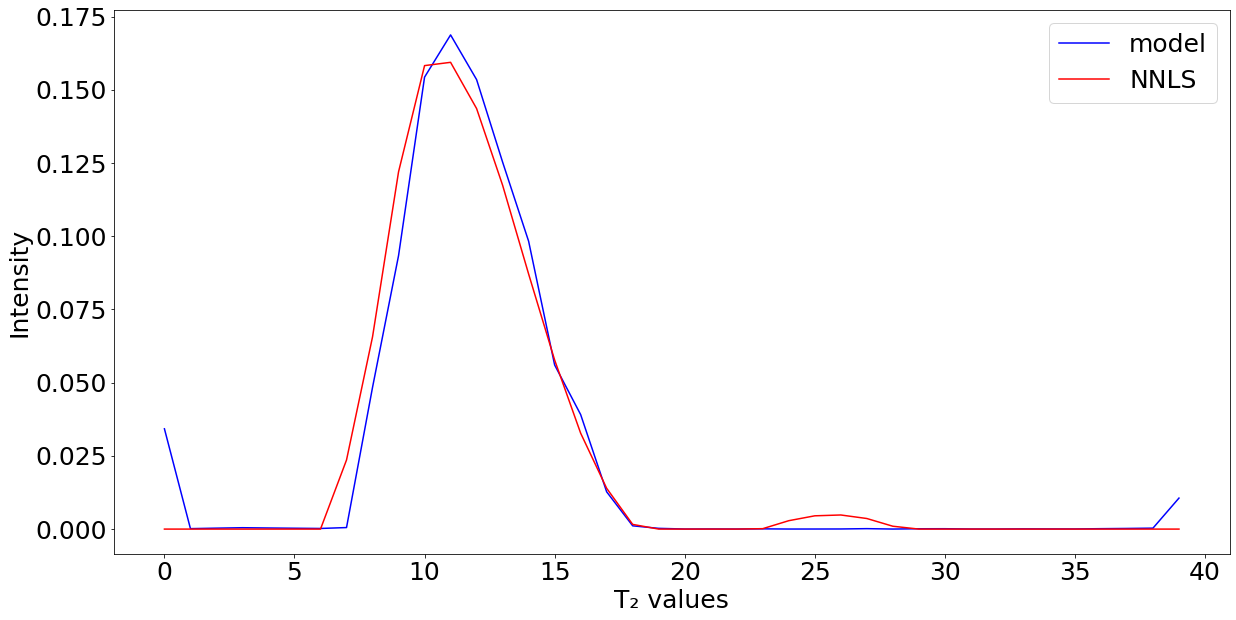

39


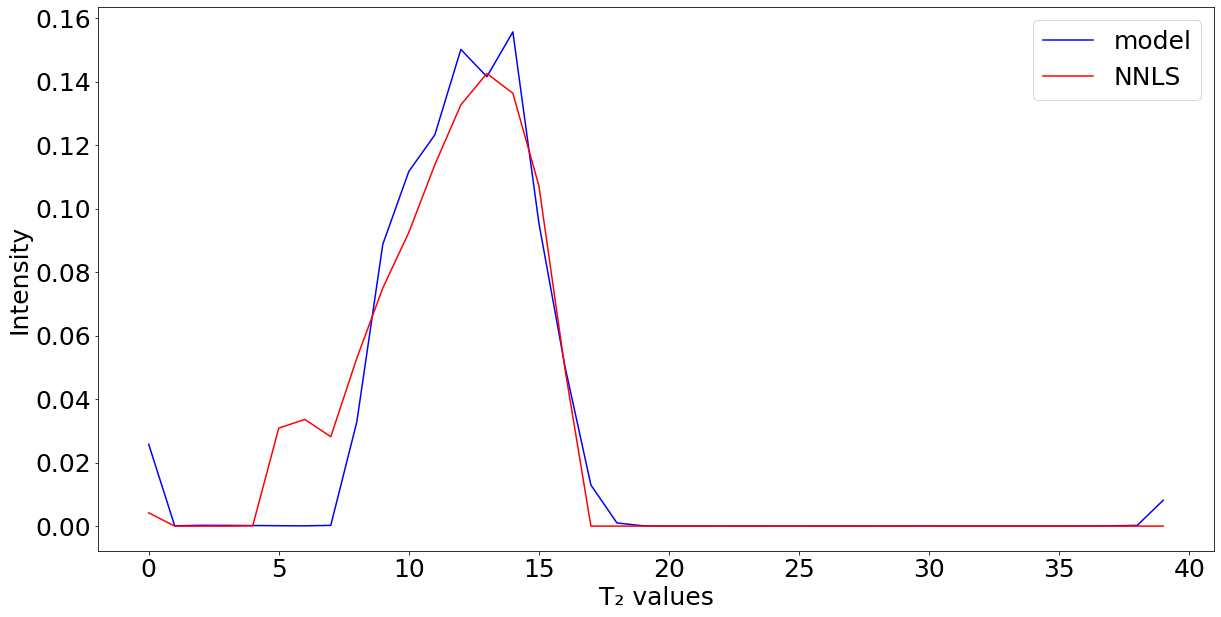

40


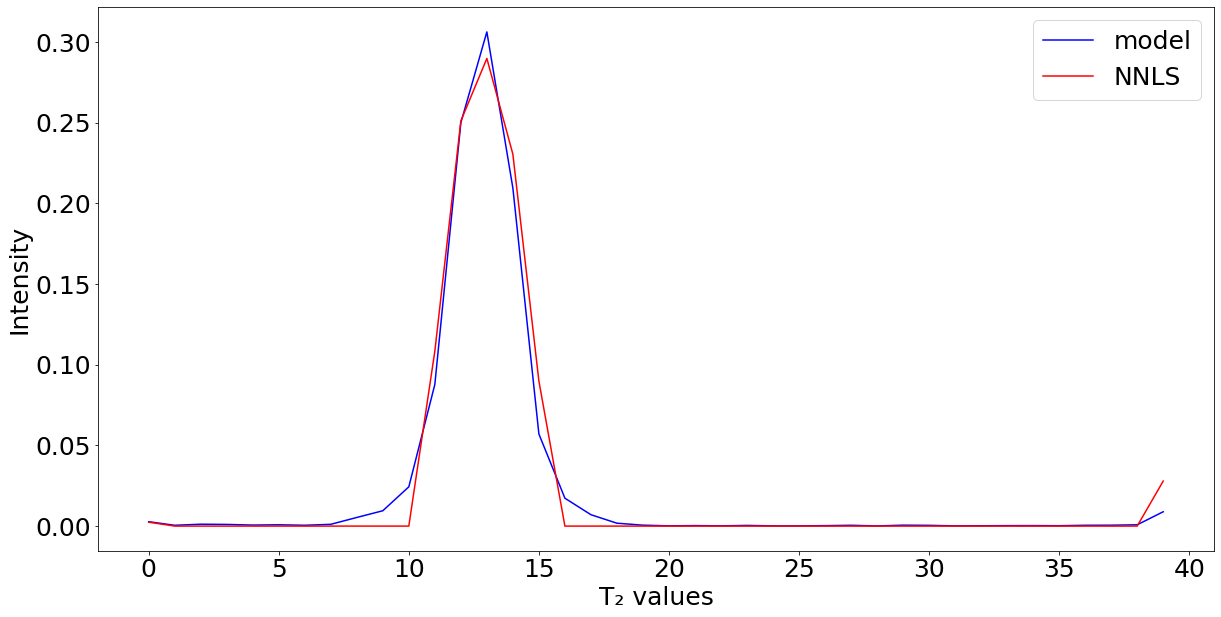

41


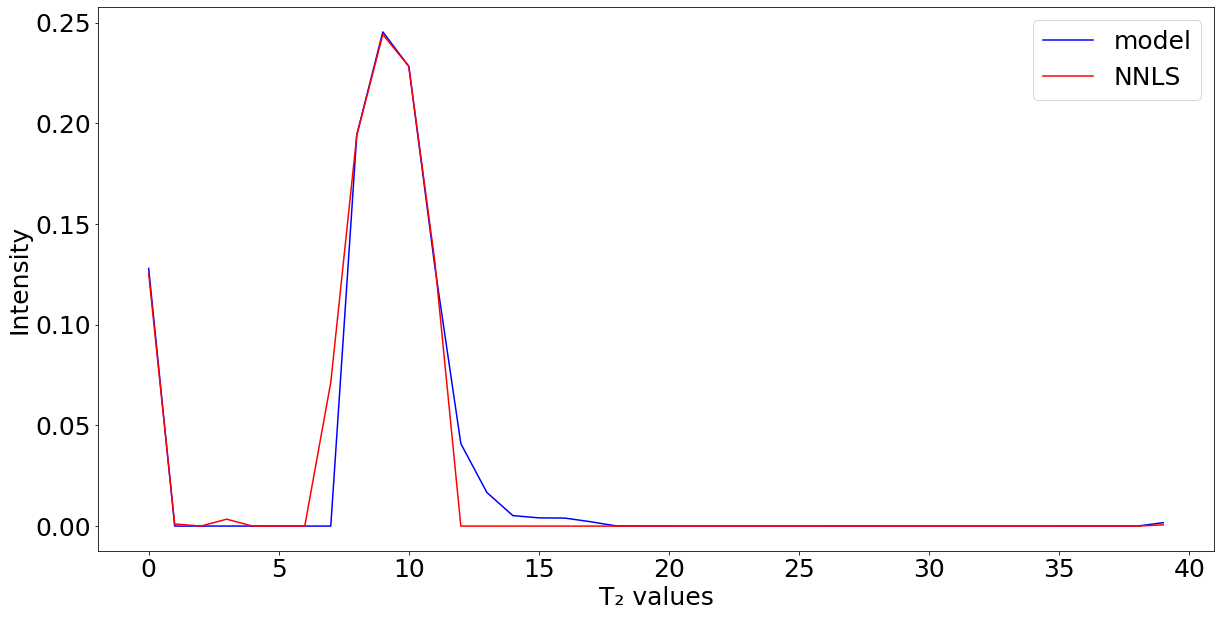

42


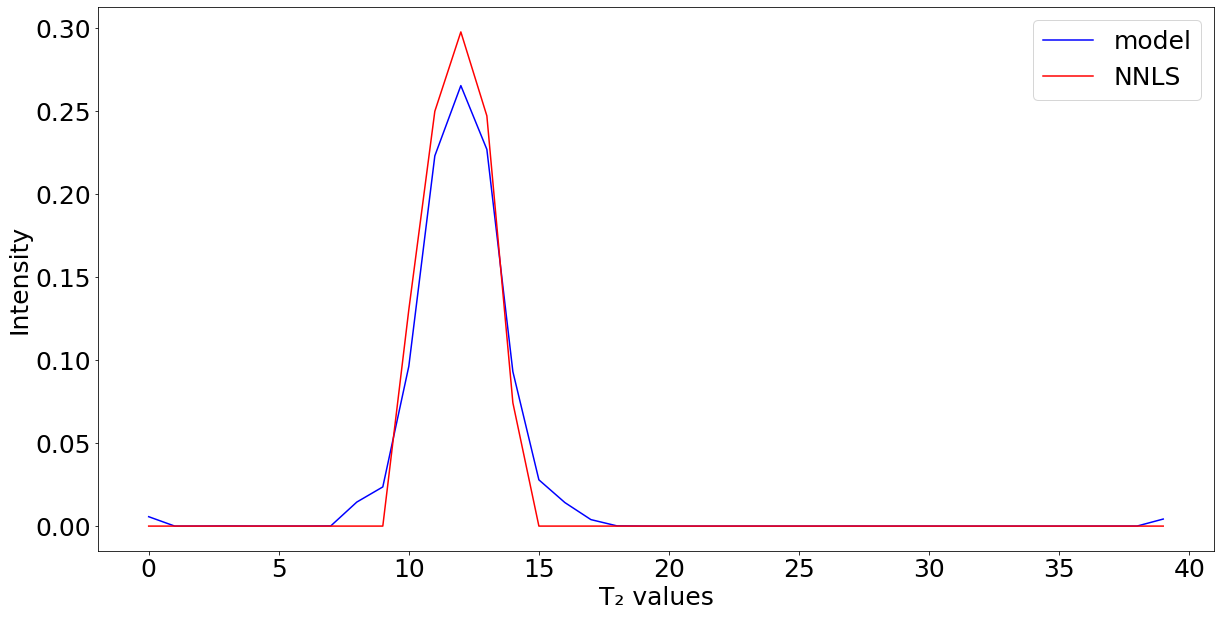

43


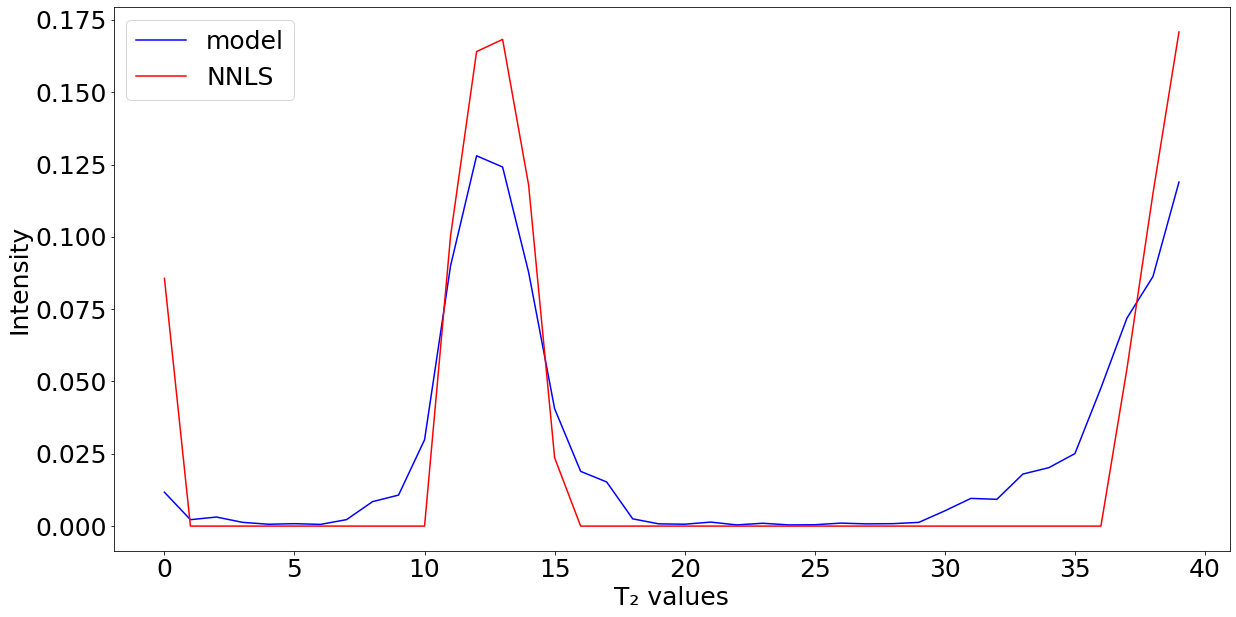

44


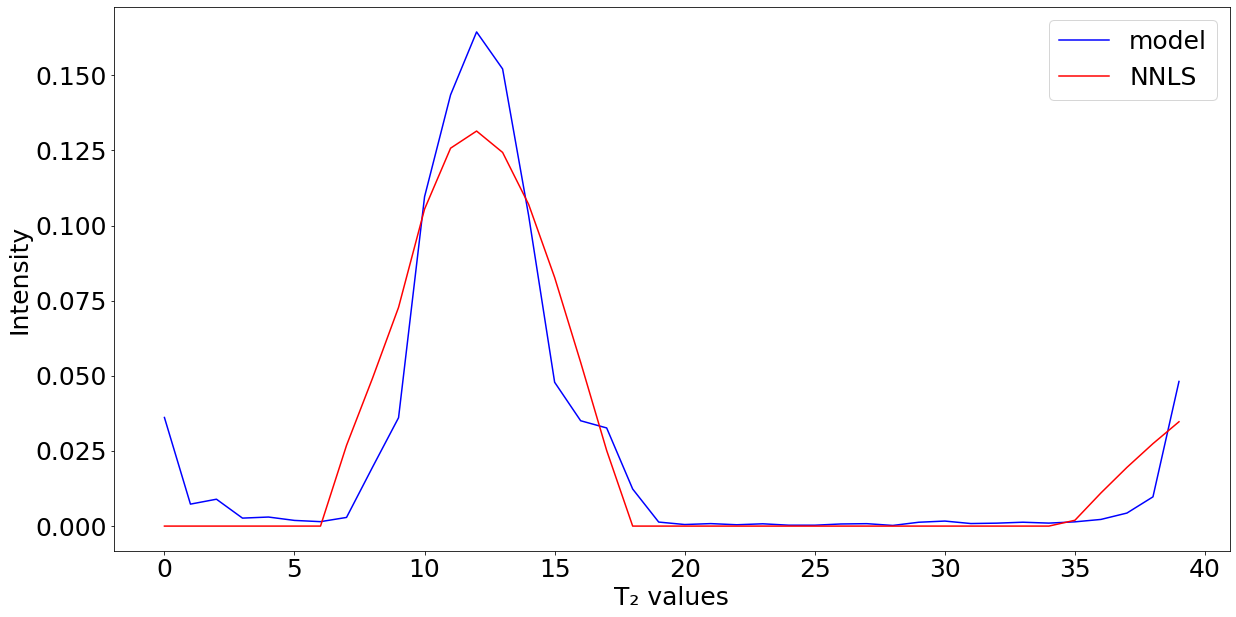

45


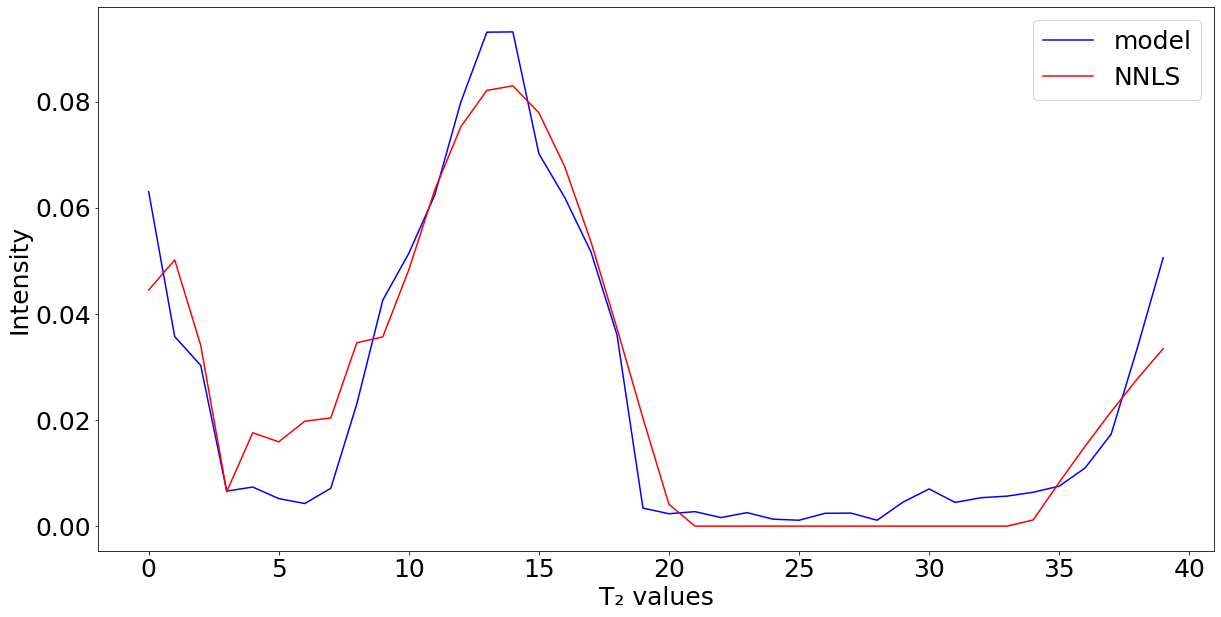

46


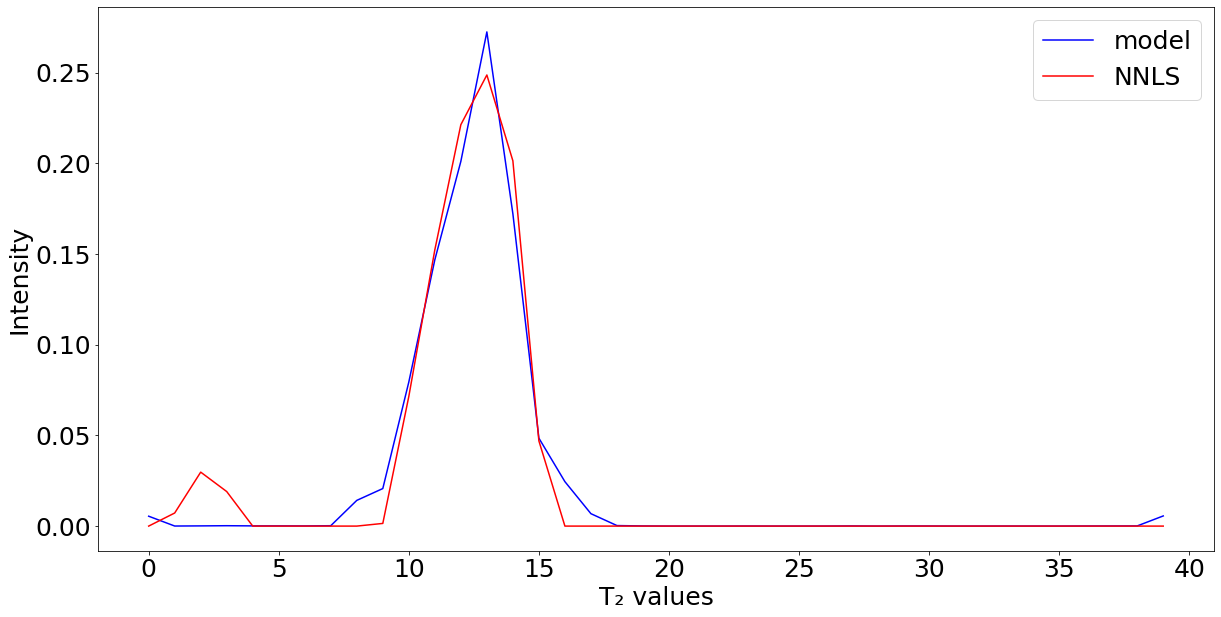

47


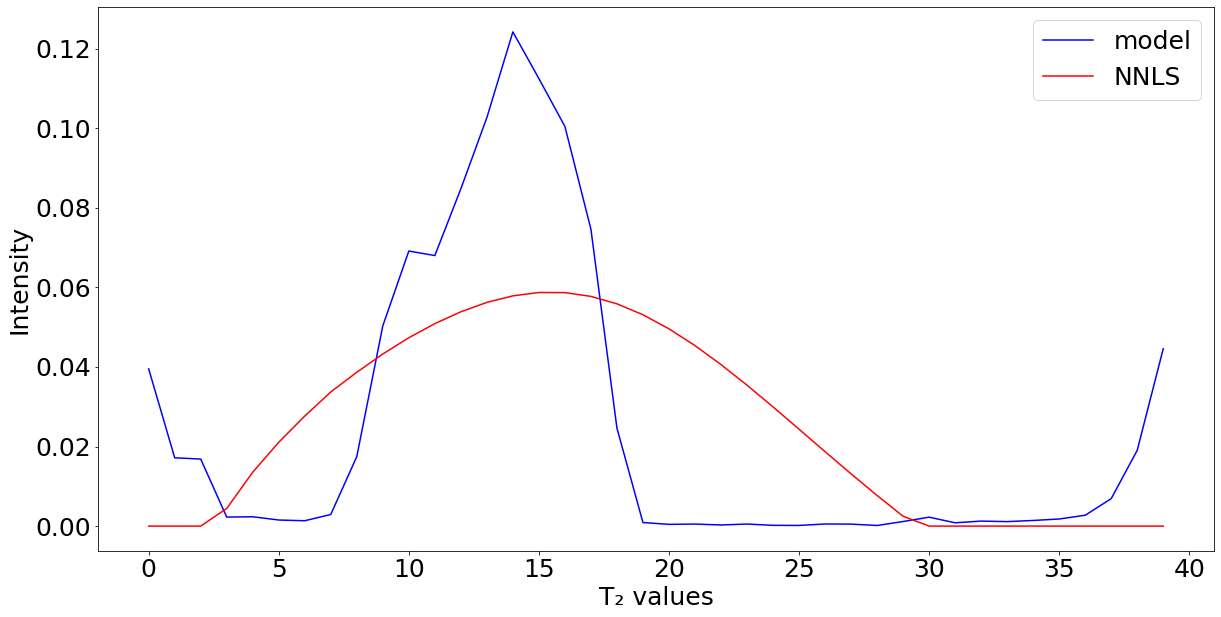

48


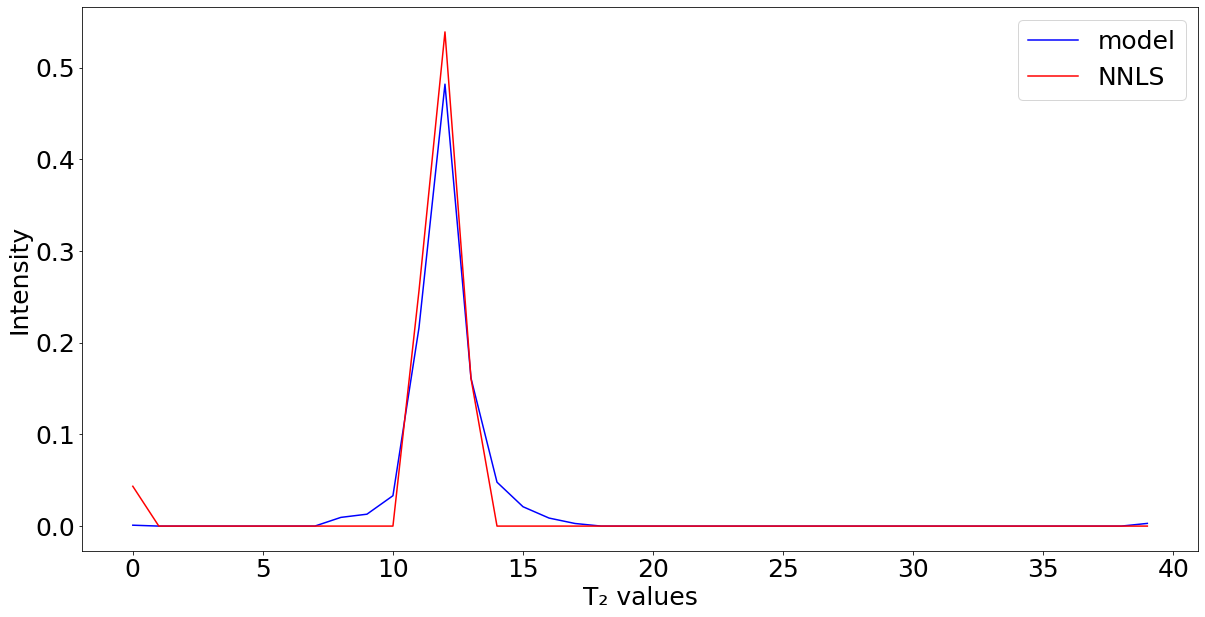

49


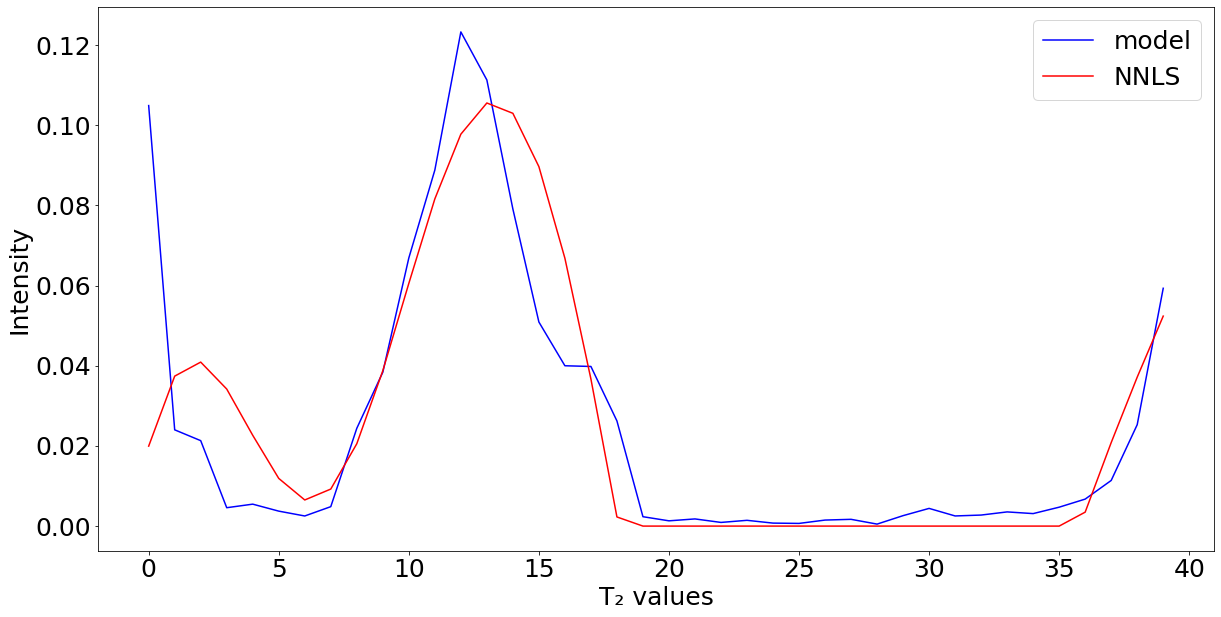

50


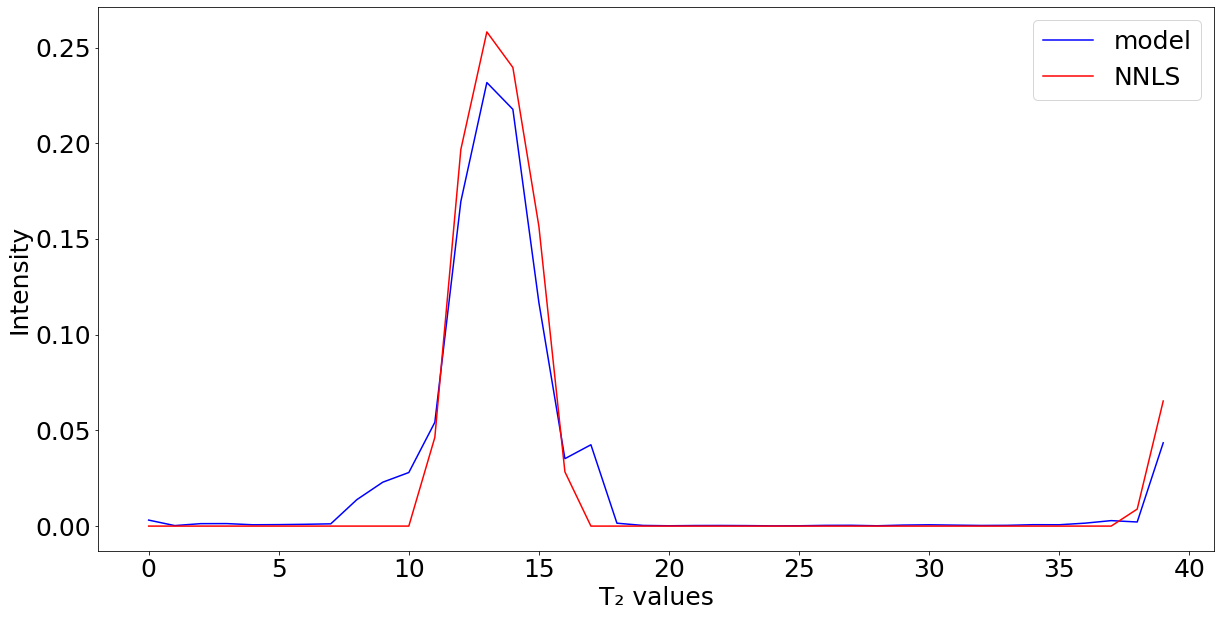

51


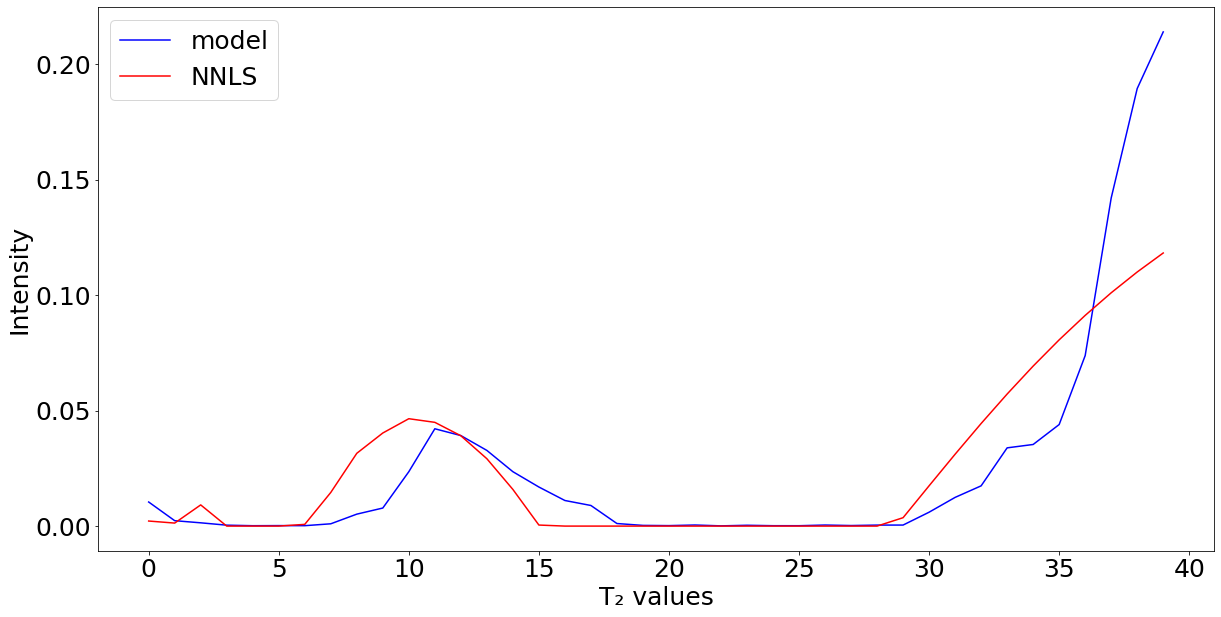

52


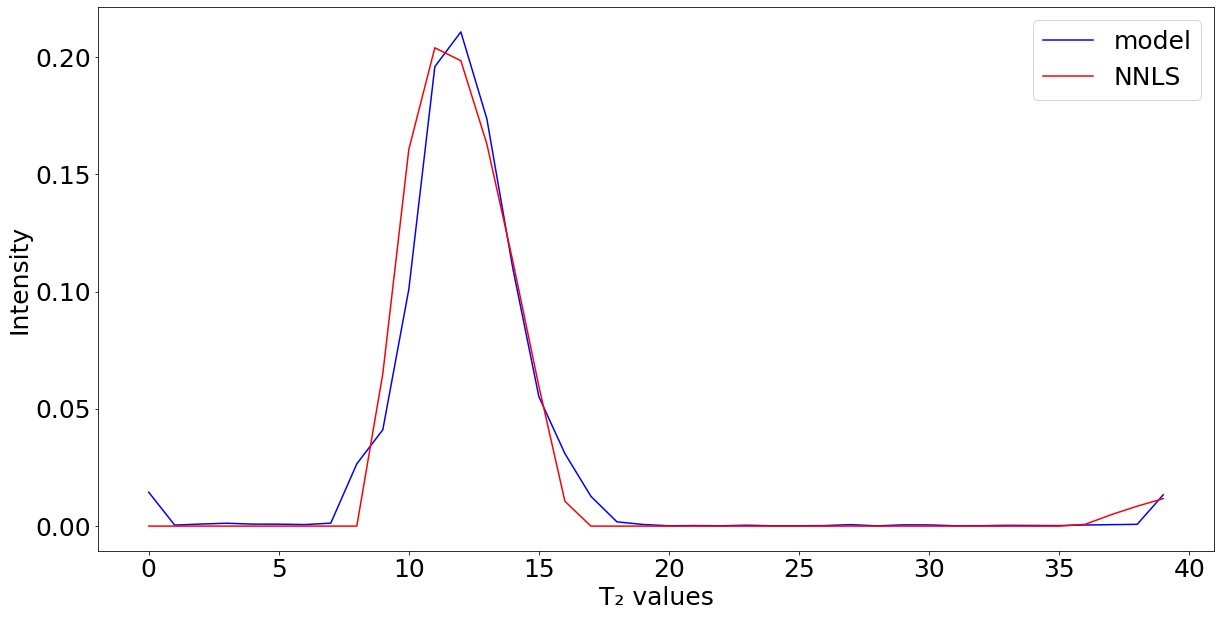

53


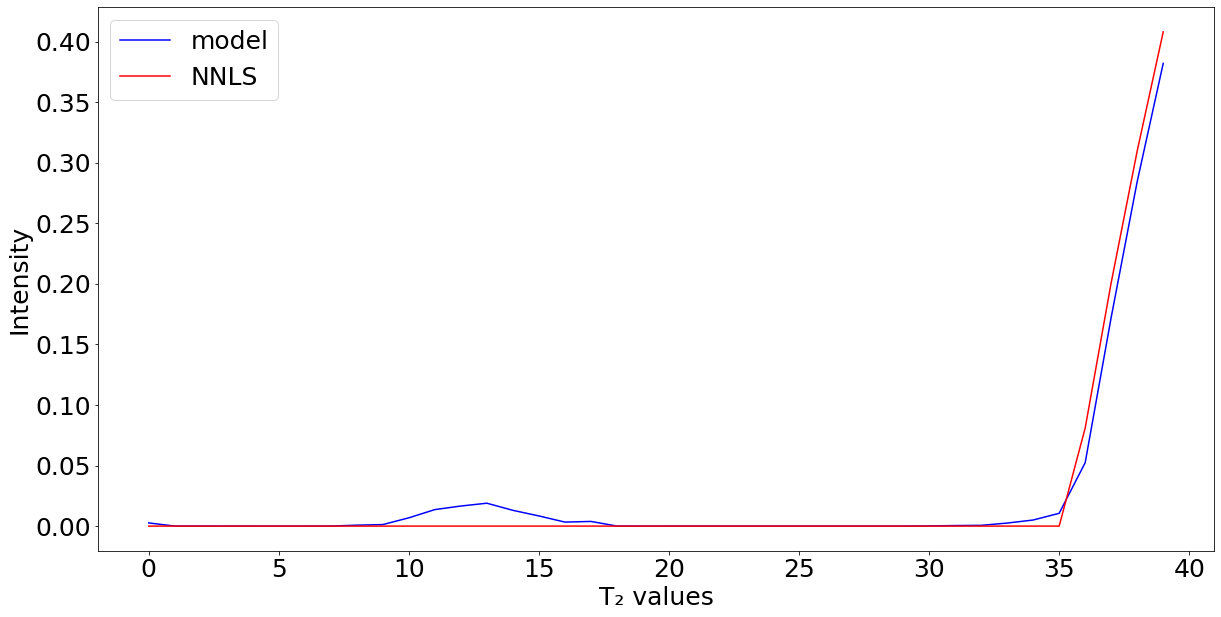

54


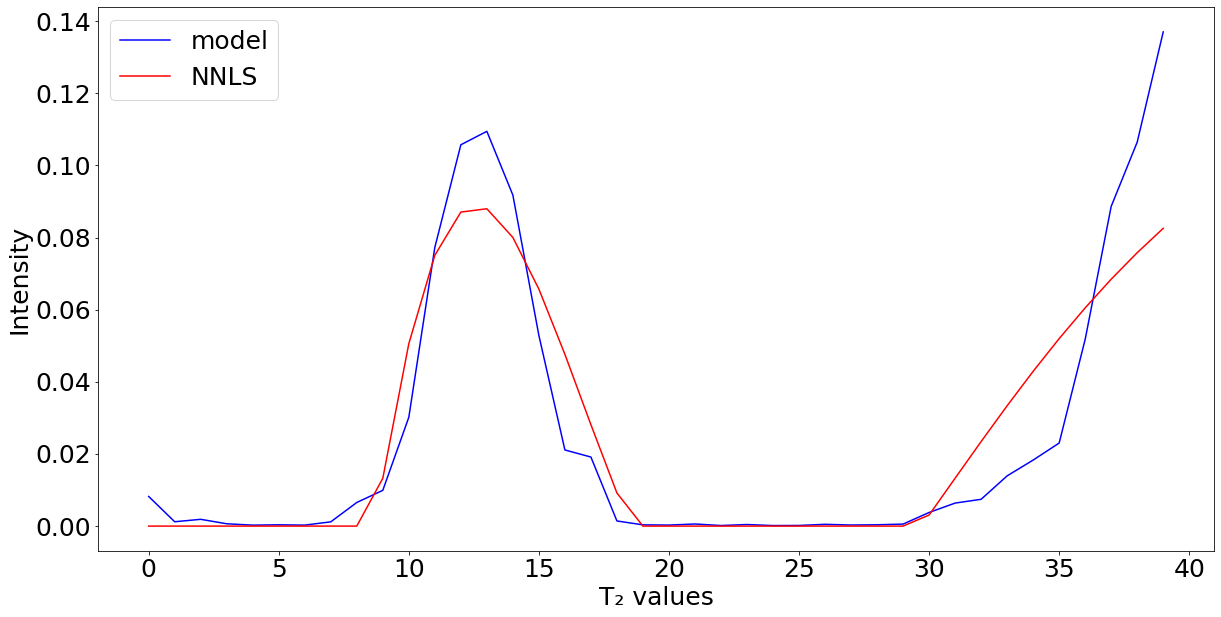

55


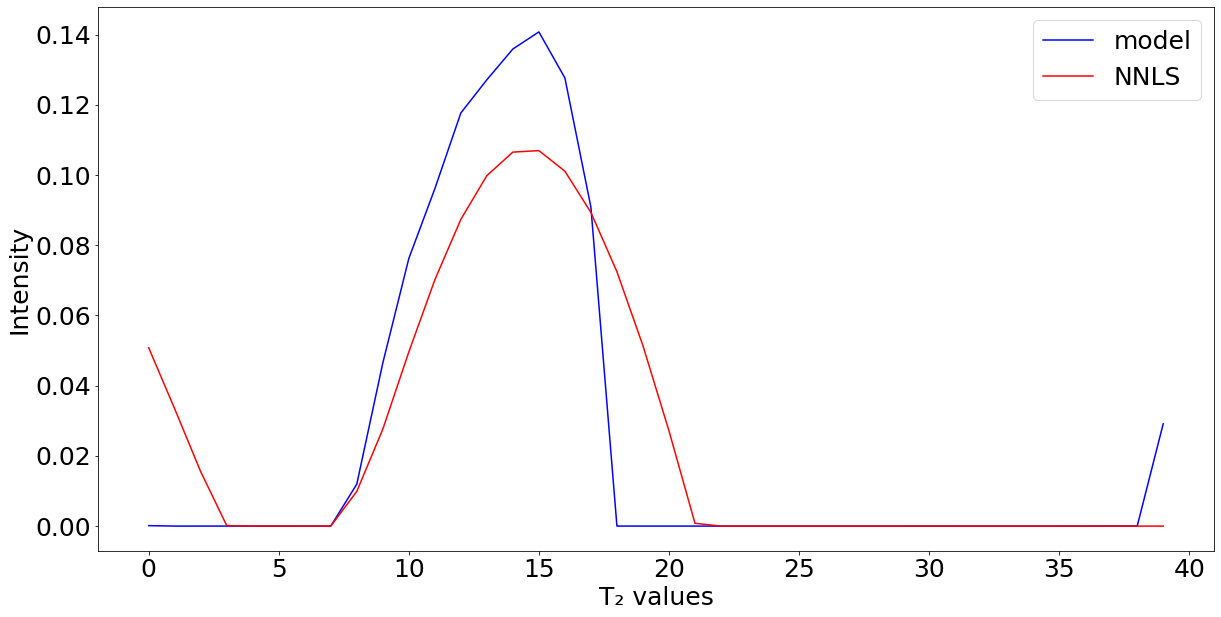

56


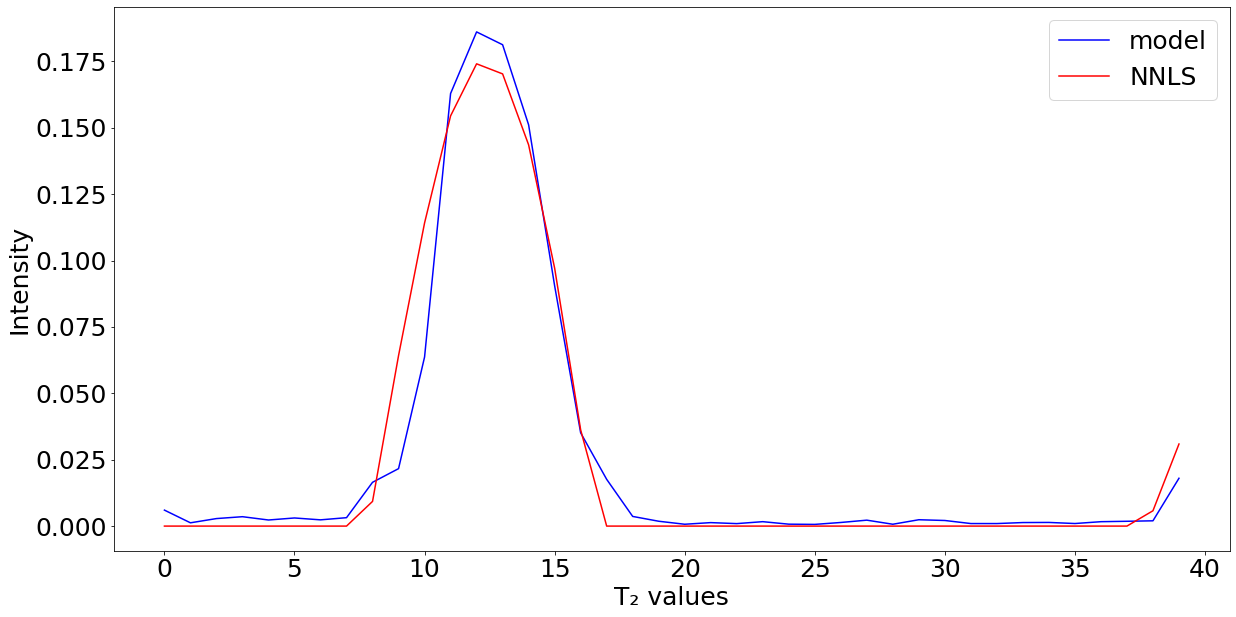

57


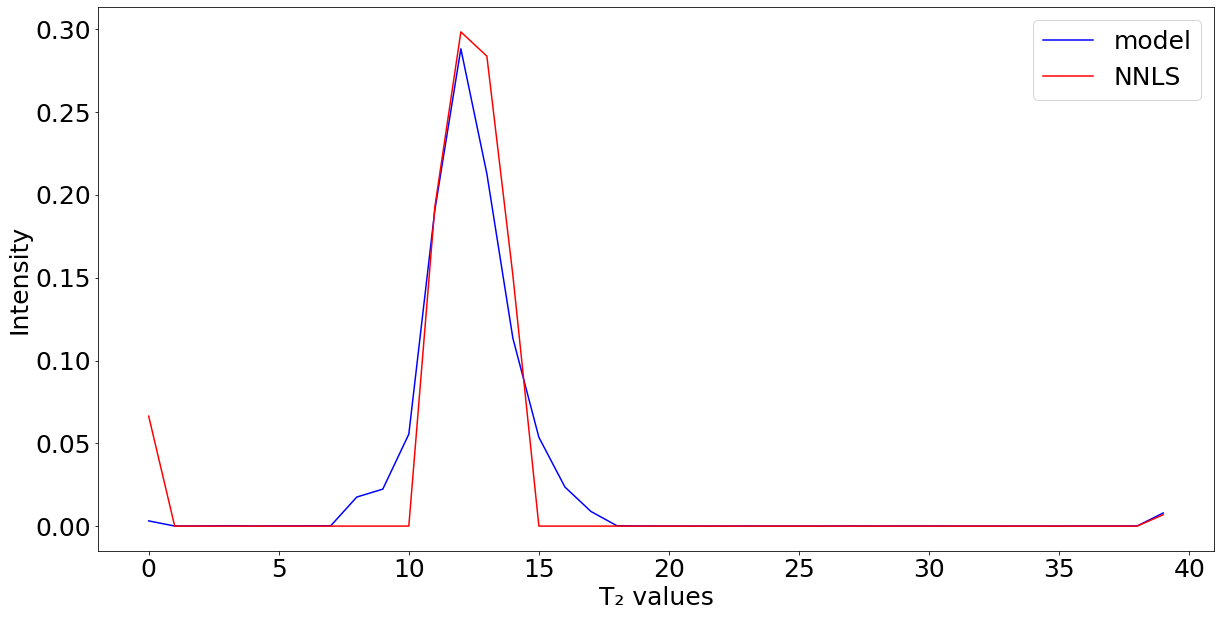

58


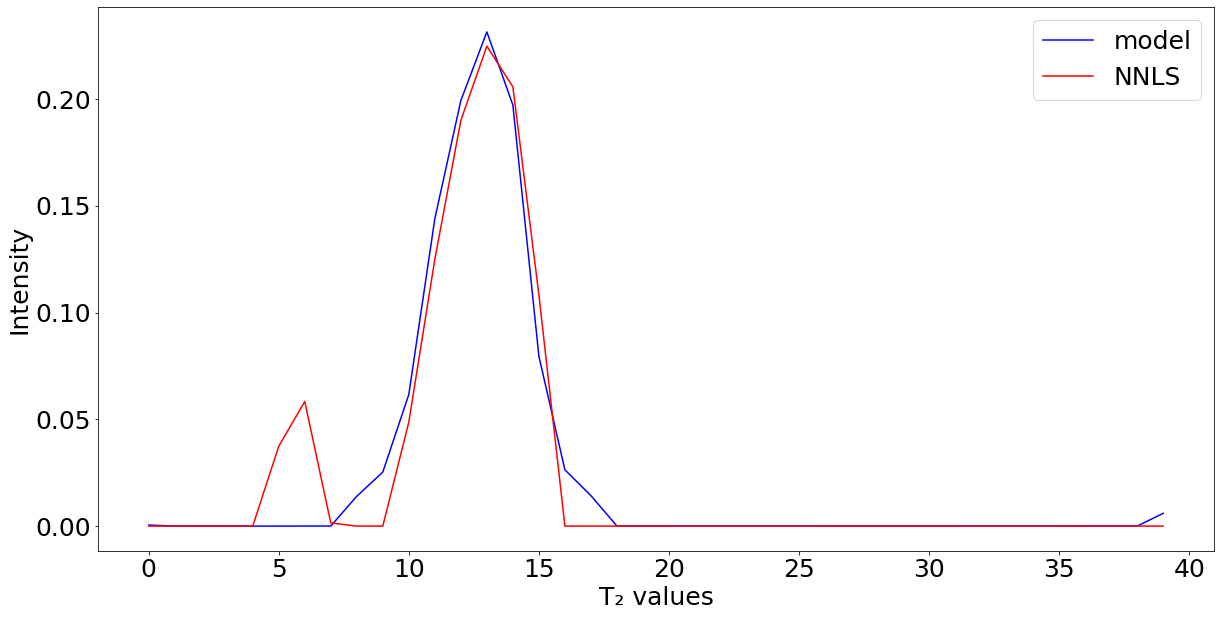

59


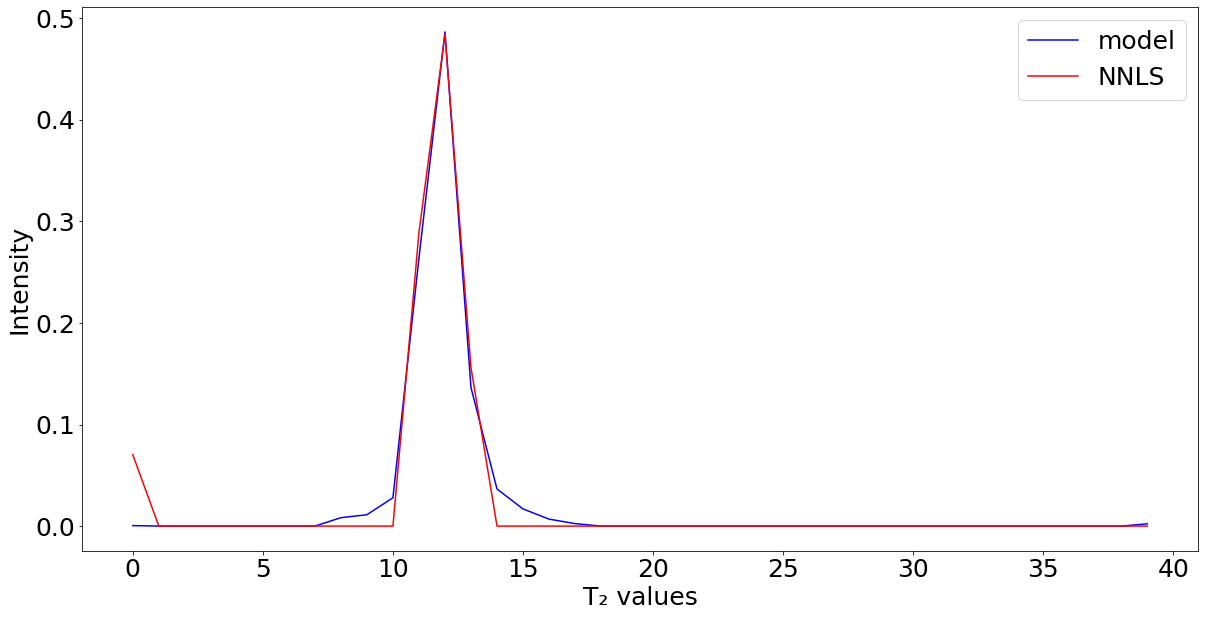

60


ValueError: The target structure is of type `<class 'NoneType'>`
  None
However the input structure is a sequence (<class 'list'>) of length 0.
  []
nest cannot guarantee that it is safe to map one to the other.

In [88]:
i_list = list(range(61))[1:]

# try again to find an example that looks like our t2 spectrum (3 peaks)
for i in i_list:
    print(i)
    predictions2 = model.predict(data[i:i+1,:])

    x = range(len(predictions2[0]))
    plt.plot(x, predictions2[0], 'b', label='model')
    plt.plot(x, labels[i,:], 'r', label='NNLS')
    plt.xlabel('T\N{SUBSCRIPT TWO} values')
    plt.ylabel('Intensity')
    plt.legend()
    #plt.savefig('../small_output/small_overlay_plot', quality=95)
    plt.show()
